In [ ]:
!pip install datasets transformers torch seaborn

In [ ]:
from datasets import load_dataset

dataset = load_dataset("argilla/magpie-ultra-v0.1")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(dataset['train'])

Dataset({
    features: ['model_name_response_base', 'instruction', 'response', 'response_base', 'intent', 'knowledge', 'difficulty', 'model_name_difficulty', 'explanation', 'quality', 'model_name_quality', 'primary_tag', 'other_tags', 'model_name_classification', 'embedding', 'model_name_embeddings', 'score', 'score_base', 'distilabel_metadata', 'nn_indices', 'nn_scores', 'messages', 'guard', 'model_name_guard', 'safe', 'hazard_category', 'score_difference'],
    num_rows: 50000
})


In [ ]:
for feature in dataset['train'].features:
    print(f"{feature}: {type(dataset['train'][feature][0])}")

model_name_response_base: <class 'str'>
instruction: <class 'str'>
response: <class 'str'>
response_base: <class 'str'>
intent: <class 'str'>
knowledge: <class 'str'>
difficulty: <class 'str'>
model_name_difficulty: <class 'str'>
explanation: <class 'str'>
quality: <class 'str'>
model_name_quality: <class 'str'>
primary_tag: <class 'str'>
other_tags: <class 'list'>
model_name_classification: <class 'str'>
embedding: <class 'list'>
model_name_embeddings: <class 'str'>
score: <class 'float'>
score_base: <class 'float'>
distilabel_metadata: <class 'dict'>
nn_indices: <class 'list'>
nn_scores: <class 'list'>
messages: <class 'list'>
guard: <class 'str'>
model_name_guard: <class 'str'>
safe: <class 'bool'>
hazard_category: <class 'str'>
score_difference: <class 'float'>


In [ ]:
print(f"Dataset size: {len(dataset['train'])} rows")
print("Features:")
for feature, feature_type in dataset['train'].features.items():
    print(f"- {feature}: {feature_type}")

Dataset size: 50000 rows
Features:
- model_name_response_base: Value(dtype='string', id=None)
- instruction: Value(dtype='string', id=None)
- response: Value(dtype='string', id=None)
- response_base: Value(dtype='string', id=None)
- intent: Value(dtype='string', id=None)
- knowledge: Value(dtype='string', id=None)
- difficulty: Value(dtype='string', id=None)
- model_name_difficulty: Value(dtype='string', id=None)
- explanation: Value(dtype='string', id=None)
- quality: Value(dtype='string', id=None)
- model_name_quality: Value(dtype='string', id=None)
- primary_tag: Value(dtype='string', id=None)
- other_tags: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
- model_name_classification: Value(dtype='string', id=None)
- embedding: Sequence(feature=Value(dtype='float64', id=None), length=-1, id=None)
- model_name_embeddings: Value(dtype='string', id=None)
- score: Value(dtype='float64', id=None)
- score_base: Value(dtype='float64', id=None)
- distilabel_metadata: {'ra

### raw stats

In [ ]:
import numpy as np

numerical_features = ['score', 'score_base', 'score_difference']

for feature in numerical_features:
    data = dataset['train'][feature]
    print(f"\nStatistics for {feature}:")
    print(f"Mean: {np.mean(data):.4f}")
    print(f"Median: {np.median(data):.4f}")
    print(f"Standard Deviation: {np.std(data):.4f}")
    print(f"Min: {np.min(data):.4f}")
    print(f"Max: {np.max(data):.4f}")


Statistics for score:
Mean: 0.3107
Median: 0.3266
Standard Deviation: 0.0740
Min: -0.0583
Max: 0.4821

Statistics for score_base:
Mean: 0.1782
Median: 0.1835
Standard Deviation: 0.0663
Min: -0.0633
Max: 0.3905

Statistics for score_difference:
Mean: 0.1326
Median: 0.1288
Standard Deviation: 0.0730
Min: -0.2870
Max: 0.4643


In [ ]:
for feature in categorical_features:
    unique_values = set(dataset['train'][feature])
    print(f"\nUnique values in {feature}: {len(unique_values)}")
    print(f"Values: {unique_values}")


Unique values in difficulty: 6
Values: {'medium', 'easy', 'very easy', None, 'very hard', 'hard'}

Unique values in quality: 6
Values: {'excellent', 'good', 'very poor', 'poor', None, 'average'}

Unique values in primary_tag: 11
Values: {'Planning', 'Others', 'Advice seeking', 'Creative writing', 'Reasoning', 'Coding & Debugging', 'Math', 'Data analysis', 'Information seeking', 'Brainstorming', 'Editing'}

Unique values in safe: 2
Values: {False, True}

Unique values in hazard_category: 15
Values: {'S14', 'S10', 'S6', 'S3', 'S8', 'S11', 'S2', 'S1', 'S13', 'S12', 'S7', 'S9', 'S5', 'S4', None}


In [ ]:
from collections import Counter
import re

def clean_category(category):
    # Remove  non-alphanumeric except spaces
    return re.sub(r'[^a-zA-Z0-9 ]', '', category).strip()

categorical_features = ['difficulty', 'quality', 'primary_tag', 'safe', 'hazard_category']

for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    counts = Counter(clean_category(str(item)) for item in dataset['train'][feature])
    total = sum(counts.values())
    for category, count in counts.most_common():
        if category:  # Skip empty categories
            percentage = (count / total) * 100
            print(f"- {category}: {count} ({percentage:.2f}%)")

# Handle guard separately
print("\nDistribution of guard:")
guard_counts = Counter()
for item in dataset['train']['guard']:
    if 'safe' in str(item).lower():
        guard_counts['safe'] += 1
    elif 'unsafe' in str(item).lower():
        guard_counts['unsafe'] += 1
    else:
        guard_counts['unknown'] += 1

total = sum(guard_counts.values())
for category, count in guard_counts.most_common():
    percentage = (count / total) * 100
    print(f"- {category}: {count} ({percentage:.2f}%)")


Distribution of difficulty:
- hard: 23988 (47.98%)
- medium: 21112 (42.22%)
- easy: 3649 (7.30%)
- very hard: 1062 (2.12%)
- very easy: 185 (0.37%)
- None: 4 (0.01%)

Distribution of quality:
- good: 39715 (79.43%)
- average: 5129 (10.26%)
- excellent: 4208 (8.42%)
- poor: 747 (1.49%)
- very poor: 178 (0.36%)
- None: 23 (0.05%)

Distribution of primary_tag:
- Math: 48492 (96.98%)
- Information seeking: 460 (0.92%)
- Reasoning: 401 (0.80%)
- Coding  Debugging: 170 (0.34%)
- Data analysis: 149 (0.30%)
- Advice seeking: 108 (0.22%)
- Creative writing: 61 (0.12%)
- Others: 60 (0.12%)
- Editing: 47 (0.09%)
- Planning: 38 (0.08%)
- Brainstorming: 14 (0.03%)

Distribution of safe:
- True: 49651 (99.30%)
- False: 349 (0.70%)

Distribution of hazard_category:
- None: 49652 (99.30%)
- S6: 189 (0.38%)
- S14: 78 (0.16%)
- S11: 14 (0.03%)
- S9: 12 (0.02%)
- S5: 9 (0.02%)
- S13: 8 (0.02%)
- S10: 8 (0.02%)
- S8: 7 (0.01%)
- S1: 6 (0.01%)
- S2: 5 (0.01%)
- S4: 5 (0.01%)
- S7: 4 (0.01%)
- S12: 2 (0.00

In [ ]:
import numpy as np

text_features = ['instruction', 'response', 'response_base', 'intent', 'knowledge', 'explanation']

for feature in text_features:
    lengths = []
    none_count = 0
    for text in dataset['train'][feature]:
        if text is not None:
            lengths.append(len(str(text)))  # Convert to string to be safe
        else:
            none_count += 1

    if lengths:
        print(f"\nText length statistics for {feature}:")
        print(f"Mean length: {np.mean(lengths):.2f}")
        print(f"Median length: {np.median(lengths):.2f}")
        print(f"Max length: {np.max(lengths)}")
        print(f"Min length: {np.min(lengths)}")
        print(f"Number of None values: {none_count}")
        print(f"Total entries: {len(dataset['train'][feature])}")
    else:
        print(f"\nAll values in {feature} are None")


Text length statistics for instruction:
Mean length: 397.59
Median length: 197.00
Max length: 14998
Min length: 16
Number of None values: 0
Total entries: 50000

Text length statistics for response:
Mean length: 1943.57
Median length: 1621.00
Max length: 13874
Min length: 1
Number of None values: 0
Total entries: 50000

Text length statistics for response_base:
Mean length: 2583.57
Median length: 1661.00
Max length: 34810
Min length: 0
Number of None values: 0
Total entries: 50000

Text length statistics for intent:
Mean length: 113.67
Median length: 108.00
Max length: 1194
Min length: 0
Number of None values: 4
Total entries: 50000

Text length statistics for knowledge:
Mean length: 185.24
Median length: 176.00
Max length: 1694
Min length: 0
Number of None values: 4
Total entries: 50000

Text length statistics for explanation:
Mean length: 517.62
Median length: 503.00
Max length: 7235
Min length: 0
Number of None values: 23
Total entries: 50000


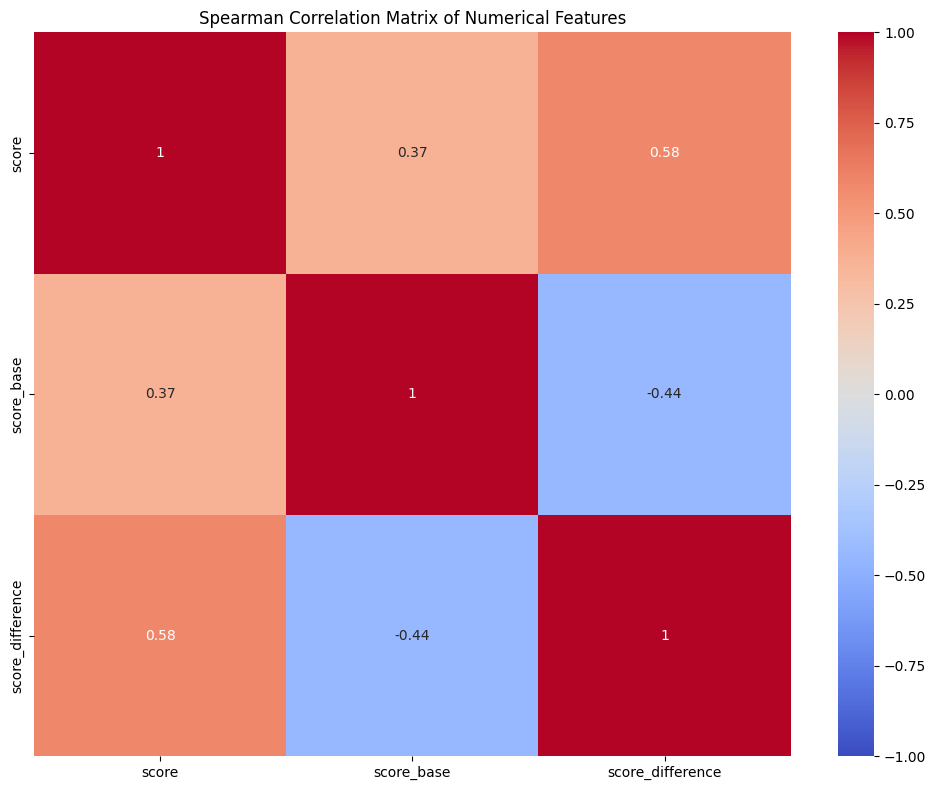


Spearman Correlation Matrix:
                     score  score_base  score_difference
score             1.000000    0.371022          0.578716
score_base        0.371022    1.000000         -0.440397
score_difference  0.578716   -0.440397          1.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the numerical features
numerical_features = ['score', 'score_base', 'score_difference']

# Create a DataFrame with only the numerical features
df_numerical = pd.DataFrame({feature: dataset['train'][feature] for feature in numerical_features})

# Calculate the Spearman correlation matrix
correlation_matrix = df_numerical.corr(method='spearman')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Spearman Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print the correlation matrix
print("\nSpearman Correlation Matrix:")
print(correlation_matrix)

### embeddings raw stats

In [ ]:
import numpy as np

embeddings = dataset['train']['embedding']

# Check if embeddings exist and are not empty
if embeddings and len(embeddings) > 0:
    # Check if all embeddings have the same dimensionality
    embedding_dims = [len(emb) for emb in embeddings if emb is not None]

    if len(set(embedding_dims)) == 1:
        embedding_dim = embedding_dims[0]
        print(f"\nEmbedding dimensionality: {embedding_dim}")

        # Calculate norms
        embedding_norms = [np.linalg.norm(emb) for emb in embeddings if emb is not None]

        print(f"Mean embedding norm: {np.mean(embedding_norms):.4f}")
        print(f"Std dev of embedding norm: {np.std(embedding_norms):.4f}")
        print(f"Min embedding norm: {np.min(embedding_norms):.4f}")
        print(f"Max embedding norm: {np.max(embedding_norms):.4f}")

        # Count of None values
        none_count = sum(1 for emb in embeddings if emb is None)
        print(f"Number of None embeddings: {none_count}")
        print(f"Total number of embeddings: {len(embeddings)}")
    else:
        print("Warning: Not all embeddings have the same dimensionality.")
        print(f"Unique dimensionalities found: {set(embedding_dims)}")
else:
    print("No embeddings found or embeddings list is empty.")


Embedding dimensionality: 1024
Mean embedding norm: 1.0000
Std dev of embedding norm: 0.0000
Min embedding norm: 1.0000
Max embedding norm: 1.0000
Number of None embeddings: 0
Total number of embeddings: 50000


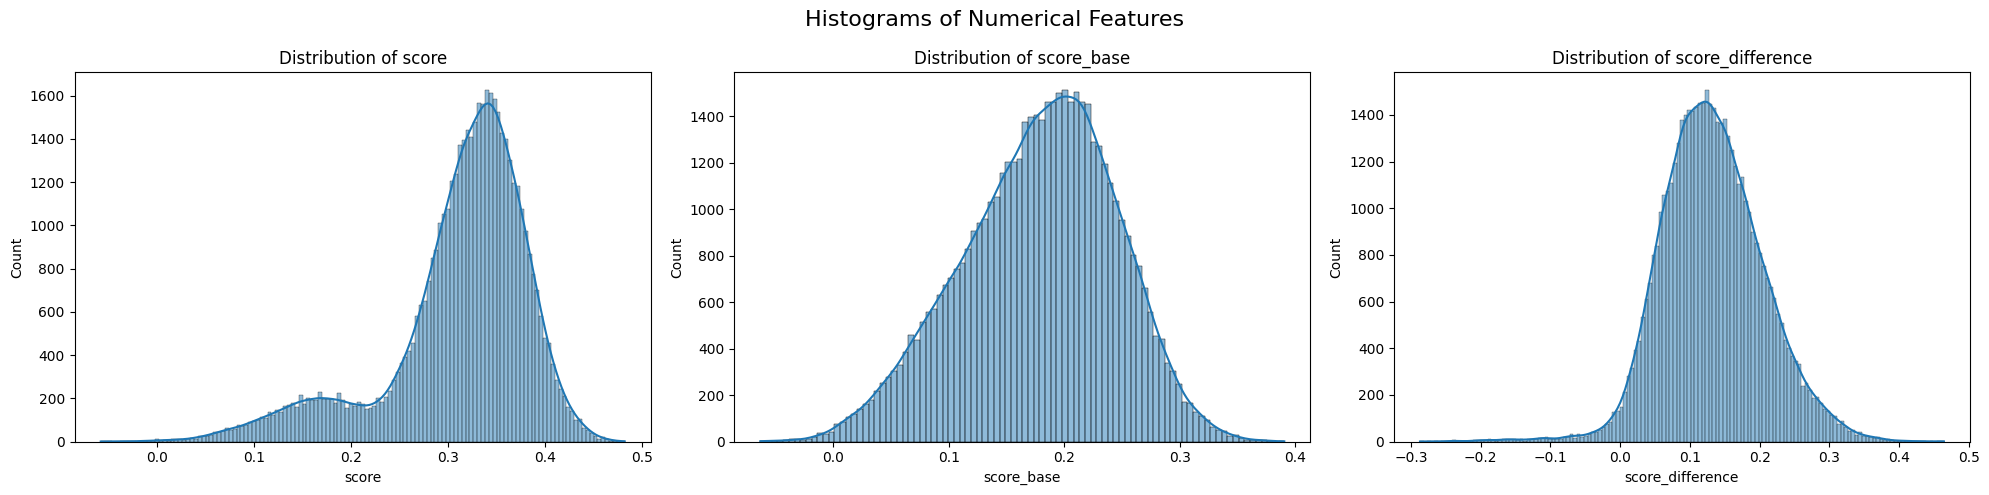

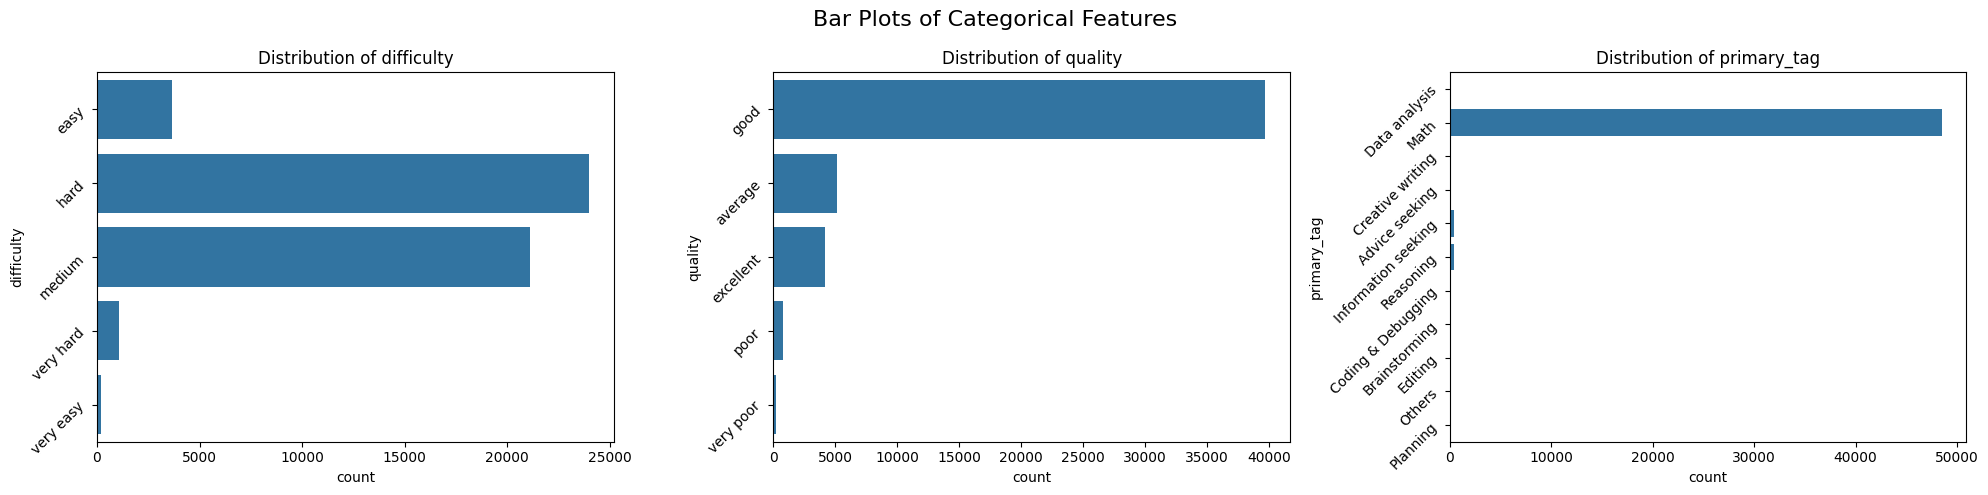

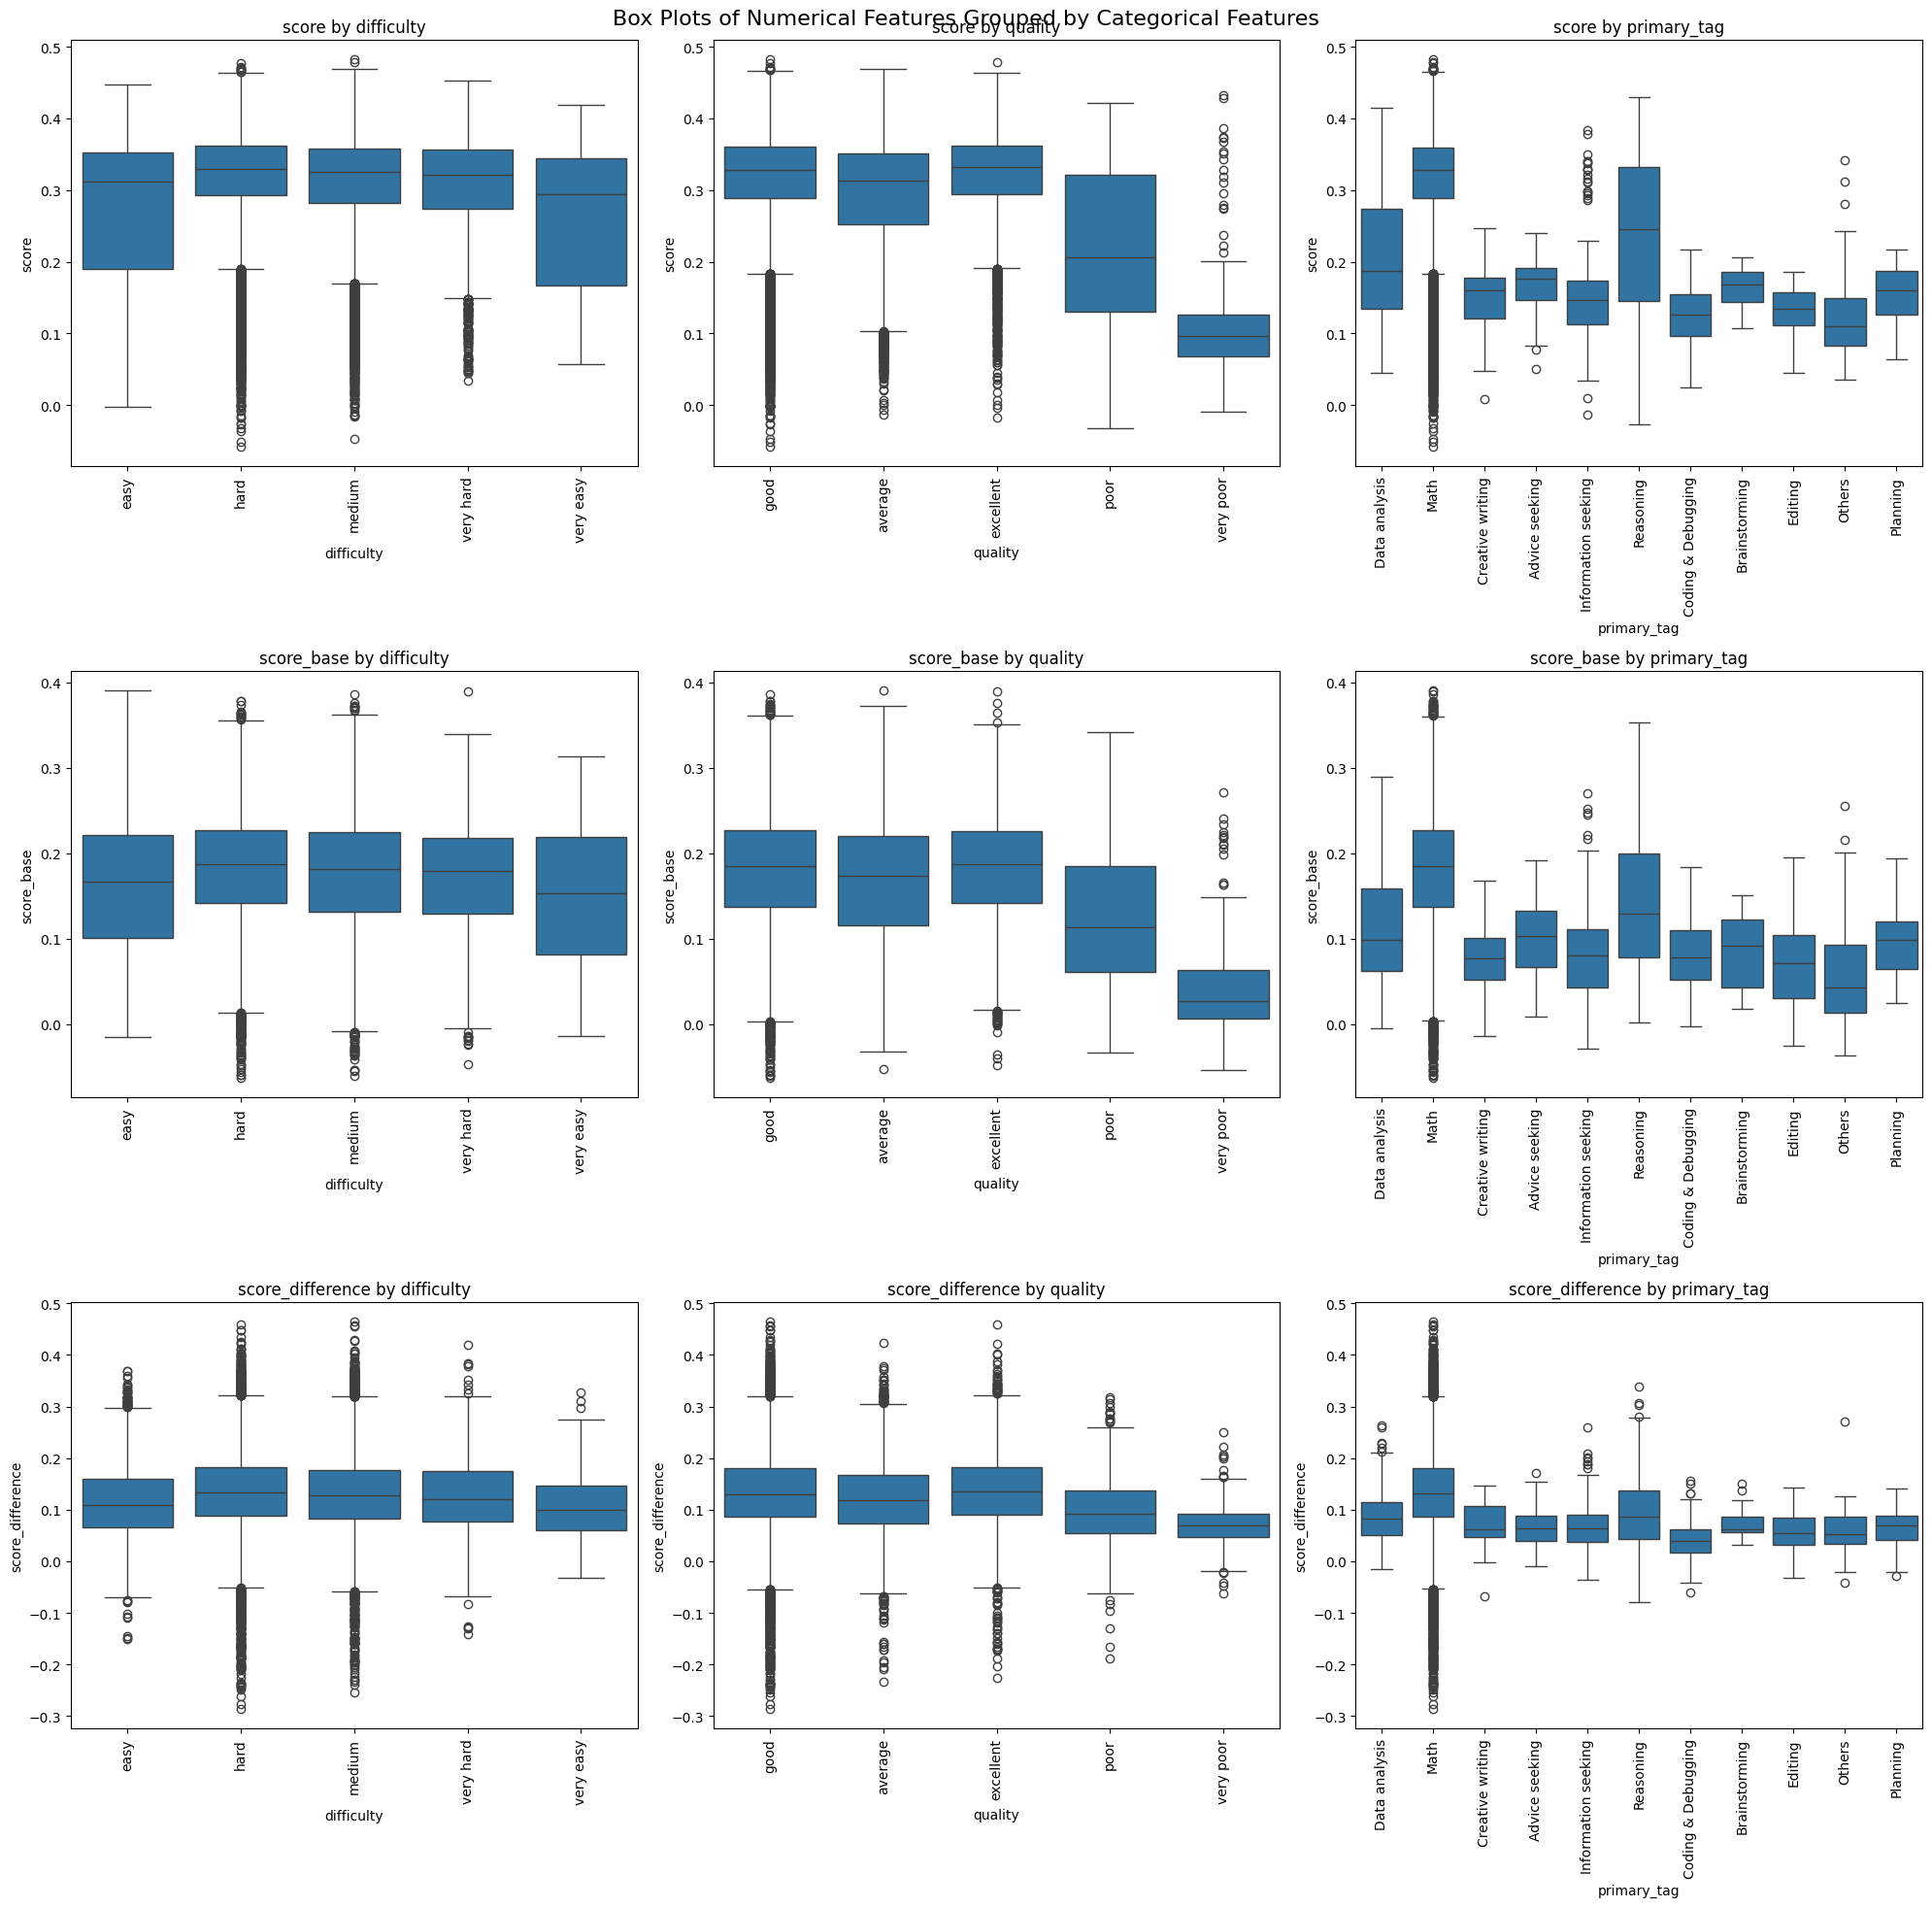

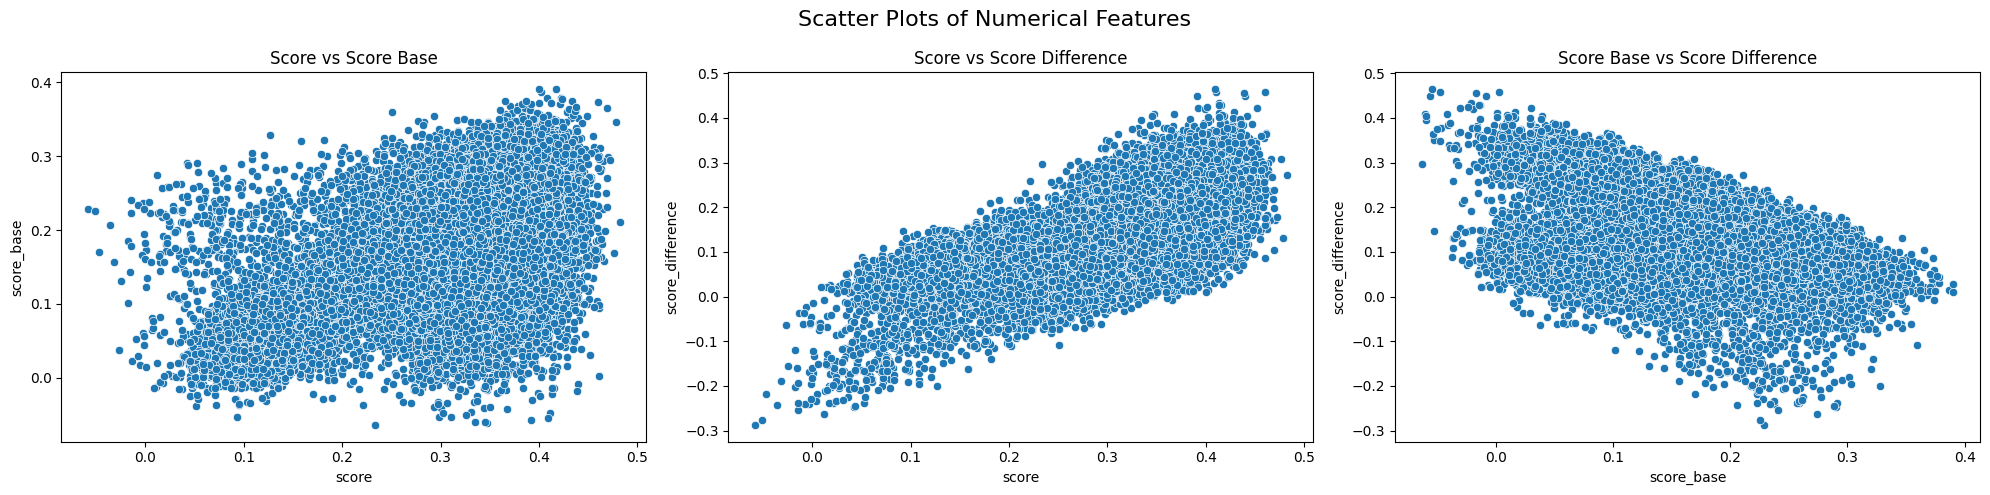

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the dataset to a pandas df
df = pd.DataFrame({
    'score': dataset['train']['score'],
    'score_base': dataset['train']['score_base'],
    'score_difference': dataset['train']['score_difference'],
    'difficulty': dataset['train']['difficulty'],
    'quality': dataset['train']['quality'],
    'primary_tag': dataset['train']['primary_tag']
})

# 1. Histograms for numerical features
numerical_features = ['score', 'score_base', 'score_difference']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Histograms of Numerical Features', fontsize=16)

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# 2. Bar plots for categorical features
categorical_features = ['difficulty', 'quality', 'primary_tag']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Bar Plots of Categorical Features', fontsize=16)

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()

# 3. Box plots for numerical features, grouped by categorical features
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Box Plots of Numerical Features Grouped by Categorical Features', fontsize=16)

for i, num_feature in enumerate(numerical_features):
    for j, cat_feature in enumerate(categorical_features):
        sns.boxplot(data=df, x=cat_feature, y=num_feature, ax=axes[i, j])
        axes[i, j].set_title(f'{num_feature} by {cat_feature}')
        axes[i, j].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# 4. Scatter plots for pairs of numerical features
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Scatter Plots of Numerical Features', fontsize=16)

sns.scatterplot(data=df, x='score', y='score_base', ax=axes[0])
axes[0].set_title('Score vs Score Base')

sns.scatterplot(data=df, x='score', y='score_difference', ax=axes[1])
axes[1].set_title('Score vs Score Difference')

sns.scatterplot(data=df, x='score_base', y='score_difference', ax=axes[2])
axes[2].set_title('Score Base vs Score Difference')

plt.tight_layout()
plt.show()

#scores dist is left skwed, -> most scores on the higher end,
#score diff is +ve -> score> score_base on avg
#score diff +ve across
#most tasks are categorised as mid or hard, barely any as v hard or v easy
# dataset heavily leaning towards math, specifically math problems of hard or medium difficukty, but with good quality ratings

#score inv proportional to difficulty -> high diff: low score, low diff: high score
#math problems typically have higher scores compared to other tags
#TODO: Investigate if this is due to class imbalance
#The score_diff is higher for items with lower score_base ->  model is good at improving lower-performing items.

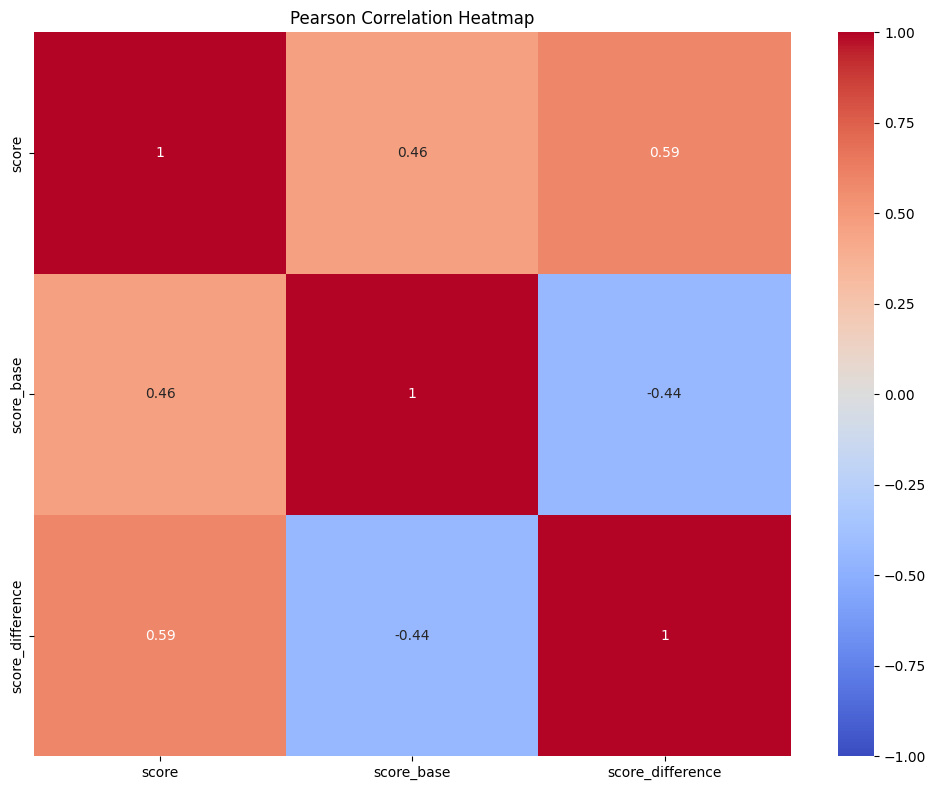

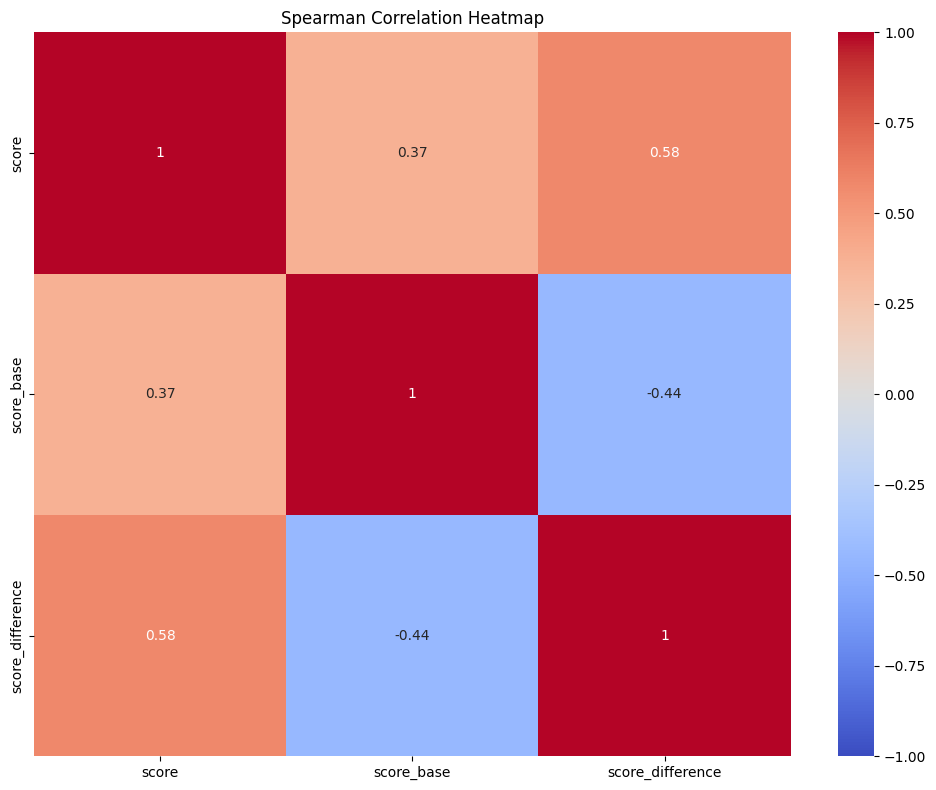

Pearson Correlation Matrix:
                     score  score_base  score_difference
score             1.000000    0.463772          0.592866
score_base        0.463772    1.000000         -0.438506
score_difference  0.592866   -0.438506          1.000000

Spearman Correlation Matrix:
                     score  score_base  score_difference
score             1.000000    0.371022          0.578716
score_base        0.371022    1.000000         -0.440397
score_difference  0.578716   -0.440397          1.000000

Difference between Pearson and Spearman Correlations:
                    score  score_base  score_difference
score             0.00000    0.092750          0.014150
score_base        0.09275    0.000000          0.001891
score_difference  0.01415    0.001891          0.000000


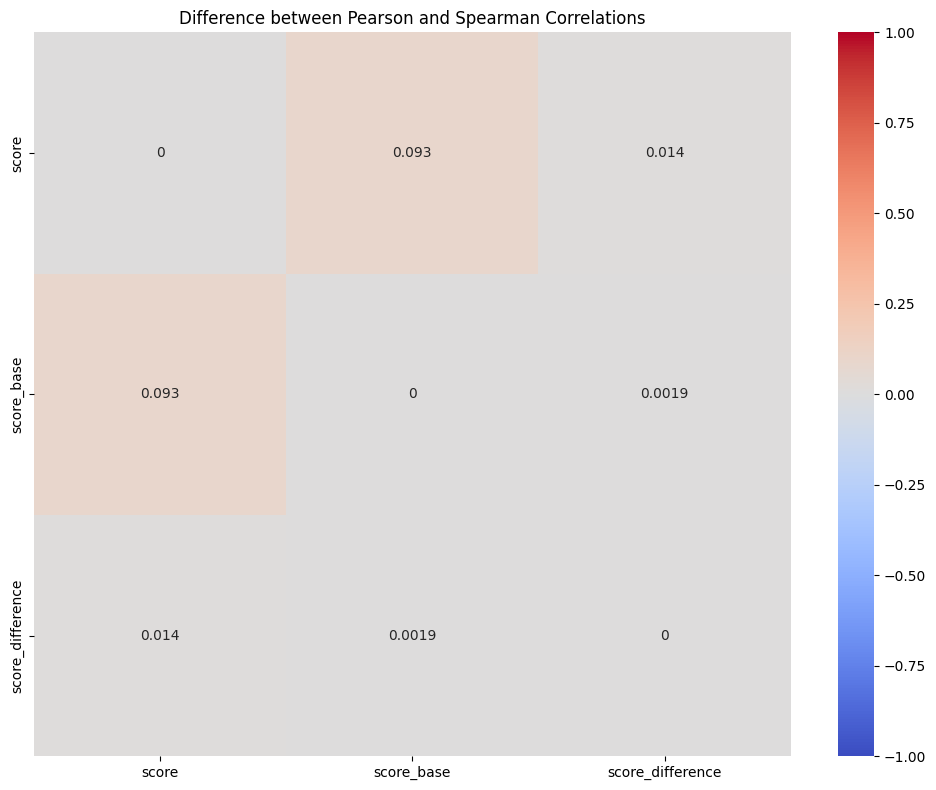

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is already loaded and numerical features are identified
numerical_features = ['score', 'score_base', 'score_difference']

# Create a DataFrame with only the numerical features
df_numerical = pd.DataFrame({feature: dataset['train'][feature] for feature in numerical_features})

# Calculate Pearson and Spearman correlation matrices
pearson_corr = df_numerical.corr(method='pearson')
spearman_corr = df_numerical.corr(method='spearman')

# Function to create correlation heatmap
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot Pearson correlation heatmap
plot_correlation_heatmap(pearson_corr, 'Pearson Correlation Heatmap')

# Plot Spearman correlation heatmap
plot_correlation_heatmap(spearman_corr, 'Spearman Correlation Heatmap')

# Print the correlation matrices
print("Pearson Correlation Matrix:")
print(pearson_corr)
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Calculate and print the difference between Pearson and Spearman correlations
diff_corr = pearson_corr - spearman_corr
print("\nDifference between Pearson and Spearman Correlations:")
print(diff_corr)

# Plot the difference
plt.figure(figsize=(10, 8))
sns.heatmap(diff_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Difference between Pearson and Spearman Correlations')
plt.tight_layout()
plt.show()

In [ ]:
!pip install wordcloud nltk textblob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


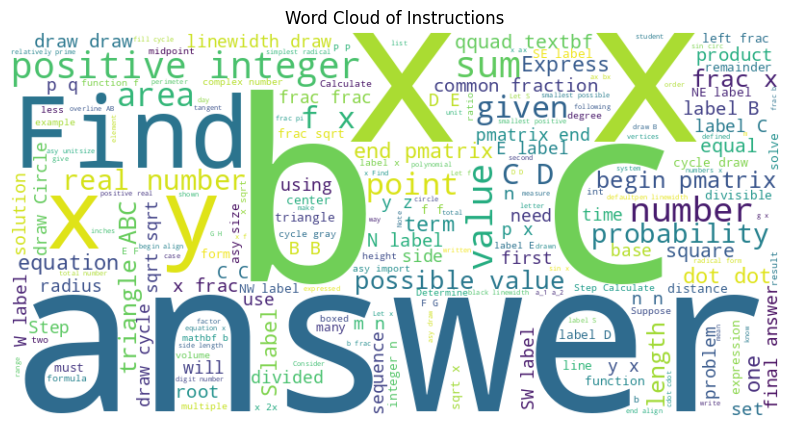

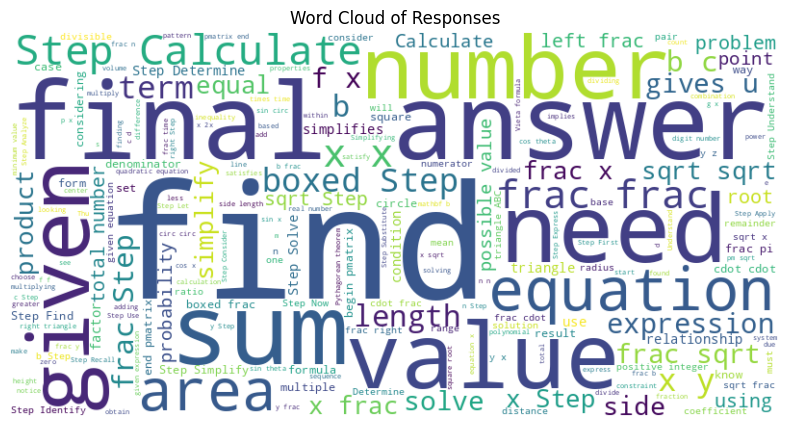

Most common words in instructions:
[('x', 40036), ('b', 32282), ('label', 23797), ('c', 23696), ('draw', 23098), ('find', 20586), ('n', 20127), ('f', 15787), ('p', 13567), ('step', 13448), ('number', 13286), ('let', 12329), ('e', 10386), ('positive', 10266), ('answer', 10110), ('real', 9997), ('value', 9913), ('two', 8986), ('numbers', 8508), ('r', 8191)]

Most common words in responses:
[('step', 411712), ('x', 193139), ('given', 97836), ('b', 96687), ('equation', 95262), ('find', 94709), ('number', 74803), ('n', 64038), ('final', 59940), ('c', 58646), ('answer', 56472), ('f', 55848), ('since', 55227), ('value', 55123), ('sum', 54313), ('calculate', 52311), ('values', 45729), ('need', 44285), ('triangle', 44257), ('expression', 43483)]

Sentiment analysis of instructions:
count    50000.000000
mean         0.036103
std          0.206588
min         -0.800000
25%          0.000000
50%          0.000000
75%          0.137855
max          1.000000
dtype: float64

Sentiment analysis of re

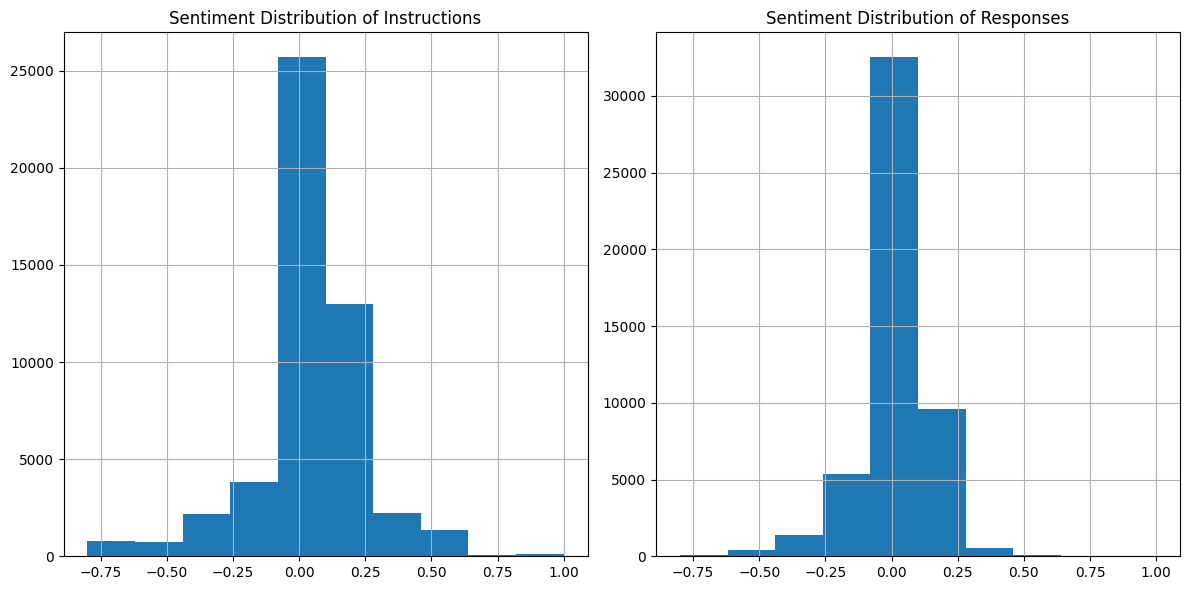

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import pandas as pd

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Function to create and display word cloud
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Function to get most common words
def get_most_common_words(texts, n=20):
    all_words = [word for text in texts for word in preprocess_text(text)]
    return Counter(all_words).most_common(n)

# Function to perform sentiment analysis
def analyze_sentiment(texts):
    sentiments = [TextBlob(text).sentiment.polarity for text in texts]
    return pd.Series(sentiments).describe()

# Analyze 'instruction' field
instructions = dataset['train']['instruction']
responses = dataset['train']['response']

# Word Clouds
create_word_cloud(' '.join(instructions), 'Word Cloud of Instructions')
create_word_cloud(' '.join(responses), 'Word Cloud of Responses')

# Most common words
print("Most common words in instructions:")
print(get_most_common_words(instructions))
print("\nMost common words in responses:")
print(get_most_common_words(responses))

# Sentiment Analysis
print("\nSentiment analysis of instructions:")
print(analyze_sentiment(instructions))
print("\nSentiment analysis of responses:")
print(analyze_sentiment(responses))

# Visualize sentiment distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
pd.Series([TextBlob(text).sentiment.polarity for text in instructions]).hist()
plt.title('Sentiment Distribution of Instructions')
plt.subplot(1, 2, 2)
pd.Series([TextBlob(text).sentiment.polarity for text in responses]).hist()
plt.title('Sentiment Distribution of Responses')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import itertools

# Convert dataset to pandas DataFrame
df = pd.DataFrame({
    'difficulty': dataset['train']['difficulty'],
    'quality': dataset['train']['quality'],
    'primary_tag': dataset['train']['primary_tag'],
    'safe': dataset['train']['safe'],
    'hazard_category': dataset['train']['hazard_category'],
    'score': dataset['train']['score'],
    'score_base': dataset['train']['score_base'],
    'score_difference': dataset['train']['score_difference']
})

# Chi-square test of independence
categorical_features = ['difficulty', 'quality', 'primary_tag', 'safe', 'hazard_category']

print("Chi-square Tests of Independence:")
for feat1, feat2 in itertools.combinations(categorical_features, 2):
    contingency_table = pd.crosstab(df[feat1], df[feat2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{feat1} vs {feat2}:")
    print(f"Chi2 statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("--------------------")

# ANOVA
numerical_features = ['score', 'score_base', 'score_difference']
categorical_features = ['difficulty', 'quality', 'primary_tag', 'safe']

print("\nANOVA Tests:")
for num_feat in numerical_features:
    for cat_feat in categorical_features:
        groups = [group for name, group in df.groupby(cat_feat)[num_feat]]
        f_statistic, p_value = f_oneway(*groups)
        print(f"{num_feat} across {cat_feat} groups:")
        print(f"F-statistic: {f_statistic:.4f}")
        print(f"p-value: {p_value:.4f}")
        print("--------------------")

Chi-square Tests of Independence:
difficulty vs quality:
Chi2 statistic: 832.7570
p-value: 0.0000
--------------------
difficulty vs primary_tag:
Chi2 statistic: 1318.4802
p-value: 0.0000
--------------------
difficulty vs safe:
Chi2 statistic: 12.6596
p-value: 0.0131
--------------------
difficulty vs hazard_category:
Chi2 statistic: 68.9386
p-value: 0.0579
--------------------
quality vs primary_tag:
Chi2 statistic: 7122.5618
p-value: 0.0000
--------------------
quality vs safe:
Chi2 statistic: 17.5879
p-value: 0.0015
--------------------
quality vs hazard_category:
Chi2 statistic: 64.2724
p-value: 0.1182
--------------------
primary_tag vs safe:
Chi2 statistic: 18.6858
p-value: 0.0444
--------------------
primary_tag vs hazard_category:
Chi2 statistic: 112.0579
p-value: 0.0664
--------------------
safe vs hazard_category:
Chi2 statistic: 0.0000
p-value: 1.0000
--------------------

ANOVA Tests:
score across difficulty groups:
F-statistic: 258.3807
p-value: 0.0000
-------------------

Cluster analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

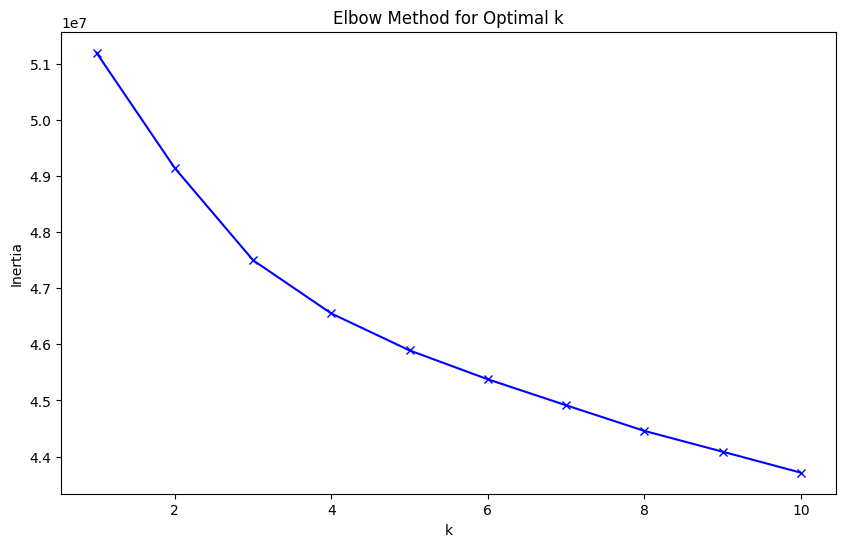

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


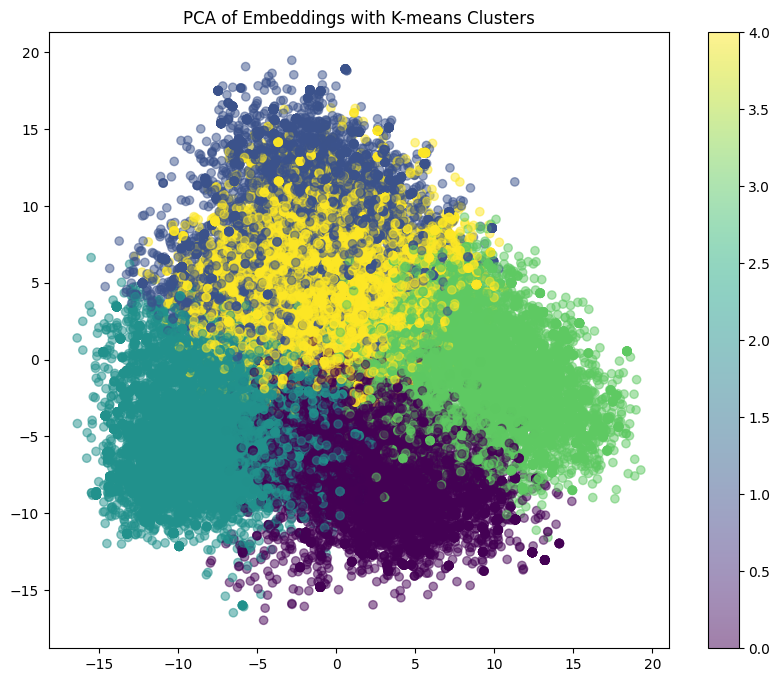

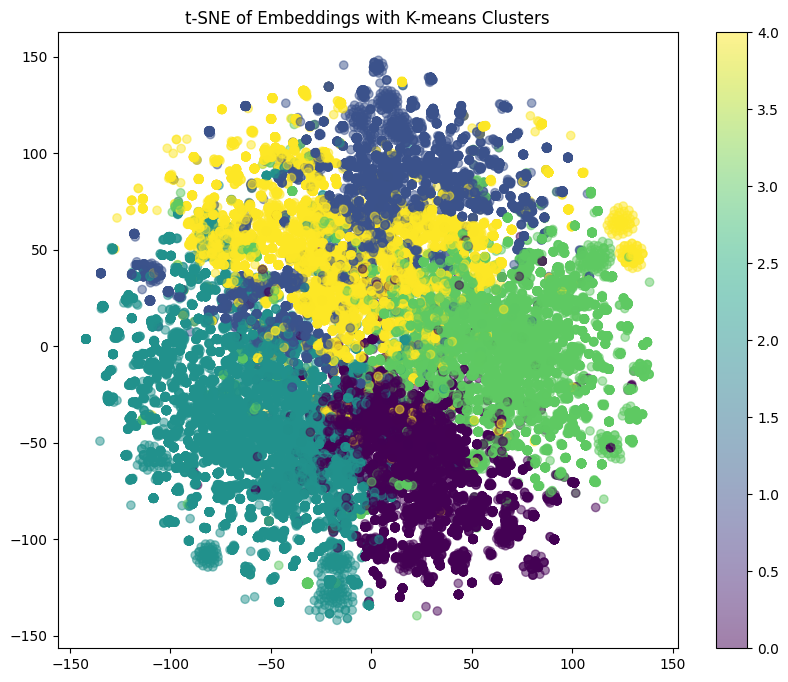

Cluster 0:
  Size: 8258
  Variance: 1.0281
  Distance from origin: 10.9503
--------------------
Cluster 1:
  Size: 8019
  Variance: 0.8404
  Distance from origin: 11.4529
--------------------
Cluster 2:
  Size: 12757
  Variance: 0.8631
  Distance from origin: 10.2548
--------------------
Cluster 3:
  Size: 11216
  Variance: 0.8725
  Distance from origin: 10.2949
--------------------
Cluster 4:
  Size: 9750
  Variance: 0.9016
  Distance from origin: 8.6878
--------------------

Distribution of difficulty in clusters:
Cluster 0:
medium       0.522950
hard         0.316822
easy         0.138186
very hard    0.015502
very easy    0.006540
Name: proportion, dtype: float64
--------------------
Cluster 1:
hard         0.552313
medium       0.375733
easy         0.048884
very hard    0.021574
very easy    0.001496
Name: proportion, dtype: float64
--------------------
Cluster 2:
medium       0.497374
hard         0.428549
easy         0.058791
very hard    0.013326
very easy    0.001960
Name: p

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract embeddings
embeddings = np.array(dataset['train']['embedding'])

# Normalize the embeddings
scaler = StandardScaler()
embeddings_normalized = scaler.fit_transform(embeddings)

# 1. PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_normalized)

# 2. t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_normalized)

# 3. K-means Clustering
# We'll use the elbow method to determine the optimal number of clusters
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings_normalized)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, choose an optimal k
optimal_k = 5  # This should be adjusted based on the elbow curve

# Perform K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_normalized)

# Visualization functions
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

# Plot PCA results
plot_embedding(embeddings_pca, cluster_labels, 'PCA of Embeddings with K-means Clusters')

# Plot t-SNE results
plot_embedding(embeddings_tsne, cluster_labels, 't-SNE of Embeddings with K-means Clusters')

# Analyze clusters
for cluster in range(optimal_k):
    cluster_embeddings = embeddings_normalized[cluster_labels == cluster]
    centroid = np.mean(cluster_embeddings, axis=0)
    variance = np.var(cluster_embeddings, axis=0)
    size = cluster_embeddings.shape[0]
    print(f"Cluster {cluster}:")
    print(f"  Size: {size}")
    print(f"  Variance: {np.mean(variance):.4f}")
    print(f"  Distance from origin: {np.linalg.norm(centroid):.4f}")
    print("--------------------")

# If you have categorical data associated with the embeddings, you can analyze their distribution in each cluster
categorical_features = ['difficulty', 'quality', 'primary_tag']
for feature in categorical_features:
    print(f"\nDistribution of {feature} in clusters:")
    feature_data = dataset['train'][feature]
    for cluster in range(optimal_k):
        cluster_data = [feature_data[i] for i in range(len(feature_data)) if cluster_labels[i] == cluster]
        value_counts = pd.Series(cluster_data).value_counts(normalize=True)
        print(f"Cluster {cluster}:")
        print(value_counts)
        print("--------------------")

#no clear elbow point, no. of clusters not v distinct
# lots of overlap in feature space since cluusters aren't very separated
#not alot of info to gain from this, just that math as a category clearly dominates

### investigate relationship of safe unsafe to categorical features

Relationship between 'safe' and categorical features:

difficulty:
Chi2 statistic: 12.6596
p-value: 0.0131


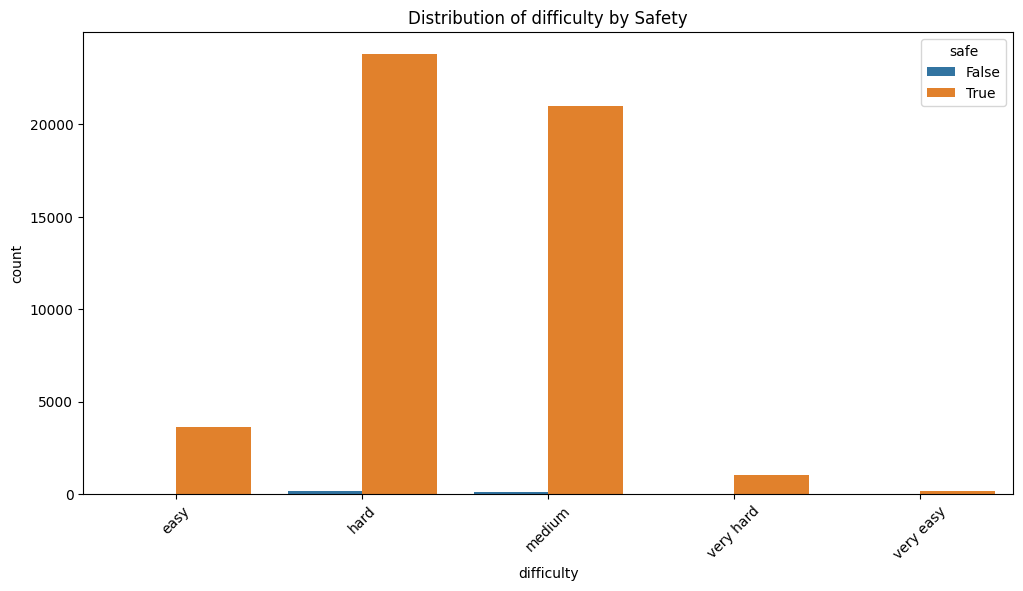


quality:
Chi2 statistic: 17.5879
p-value: 0.0015


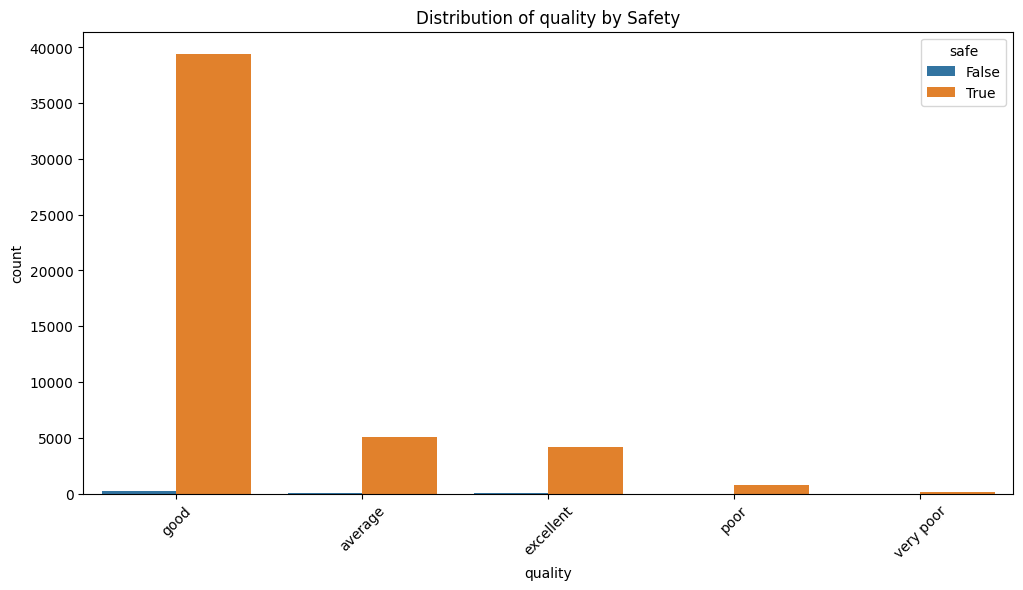


primary_tag:
Chi2 statistic: 18.6858
p-value: 0.0444


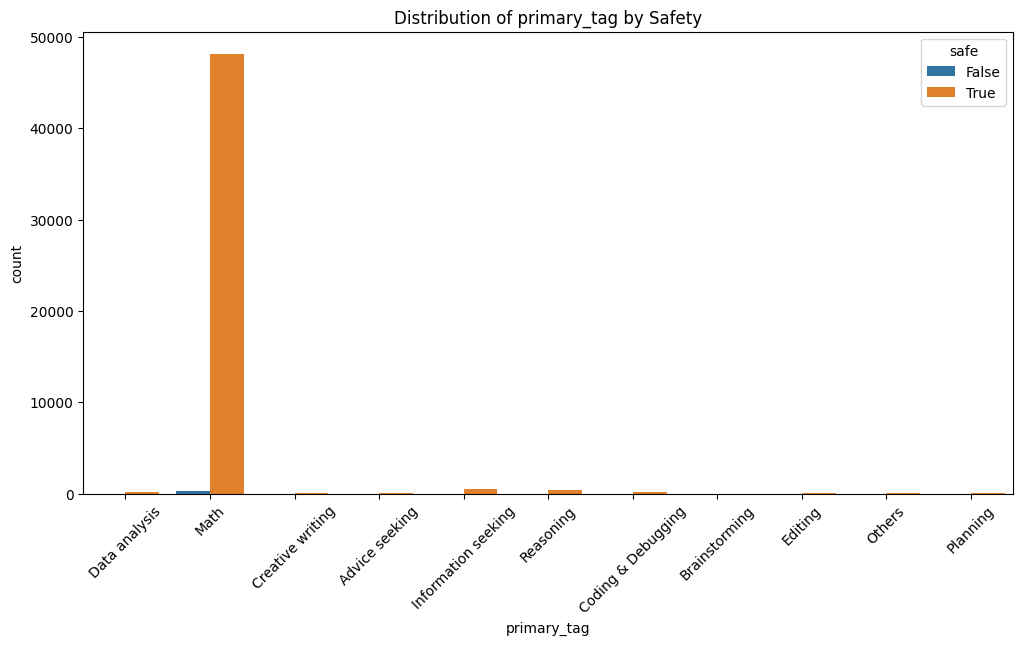


Relationship between 'safe' and numerical features:

score:
Mean for safe: 0.3115
Mean for unsafe: 0.1942


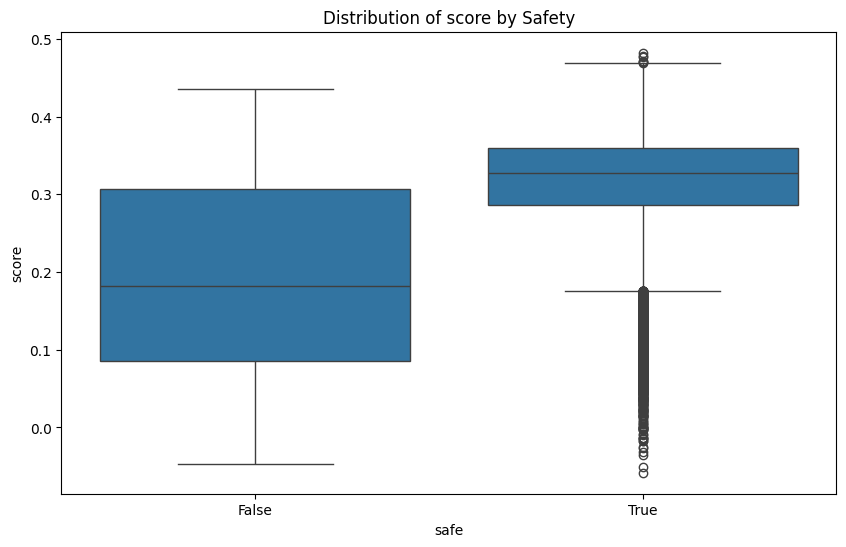


score_base:
Mean for safe: 0.1782
Mean for unsafe: 0.1727


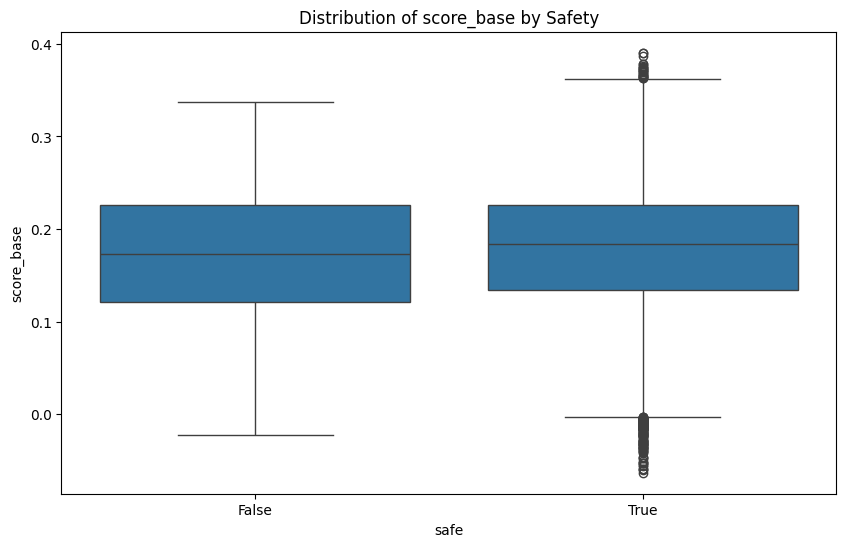


score_difference:
Mean for safe: 0.1333
Mean for unsafe: 0.0215


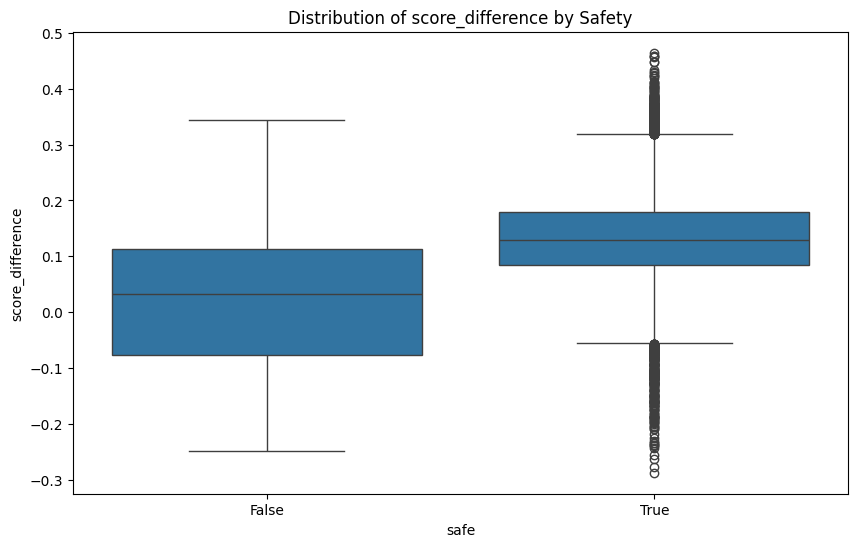


Distribution of hazard categories:
hazard_category
S6     189
S14     78
S11     14
S9      12
S5       9
S13      8
S10      8
S8       7
S1       6
S2       5
S4       5
S7       4
S12      2
S3       1
Name: count, dtype: int64


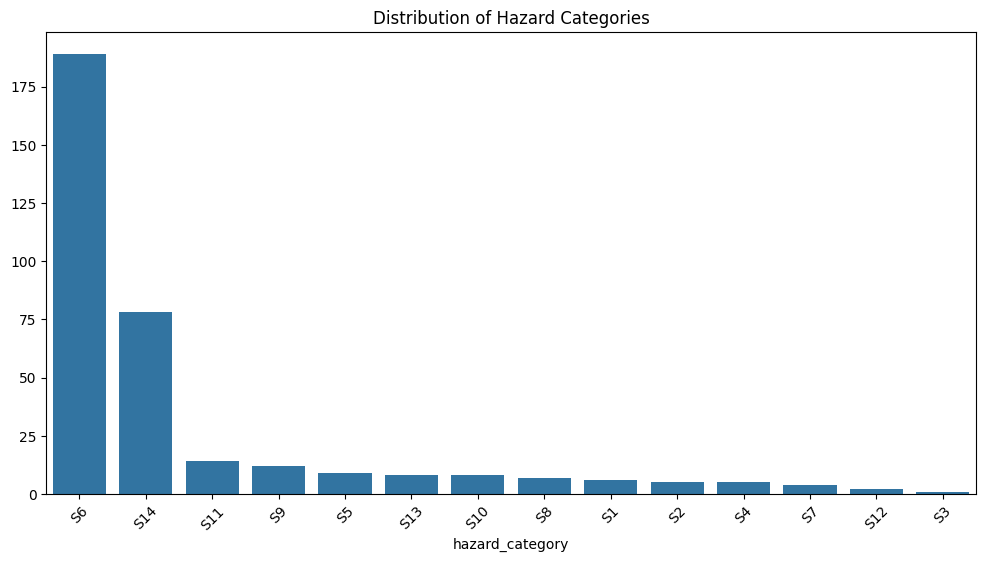


Relationship between hazard category and other features:

difficulty:
Chi2 statistic: 68.9386
p-value: 0.0579

quality:
Chi2 statistic: 64.2724
p-value: 0.1182

primary_tag:
Chi2 statistic: 112.0579
p-value: 0.0664

score:
F-statistic: 9.9280
p-value: 0.0000

score_base:
F-statistic: 0.9208
p-value: 0.5315

score_difference:
F-statistic: 10.5563
p-value: 0.0000


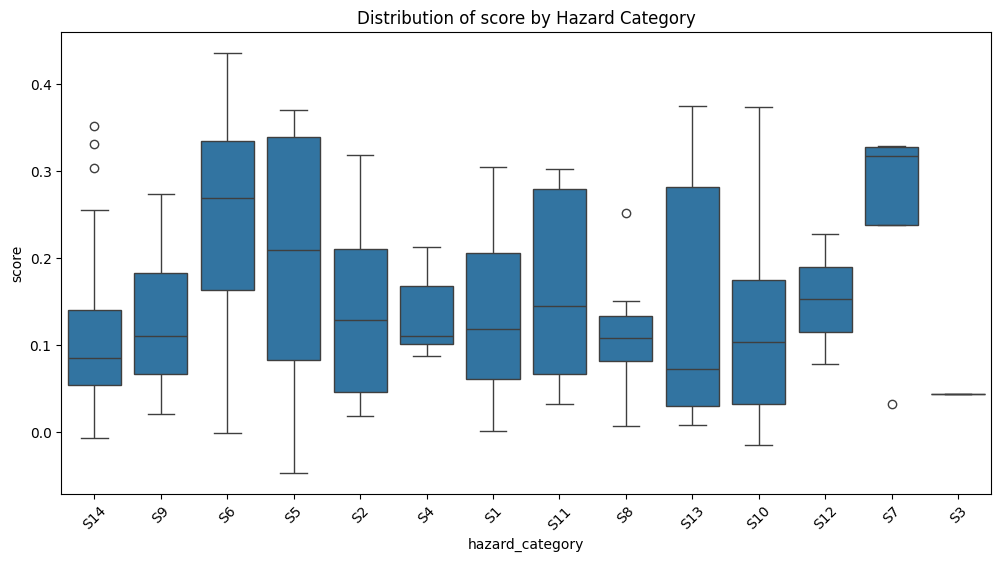

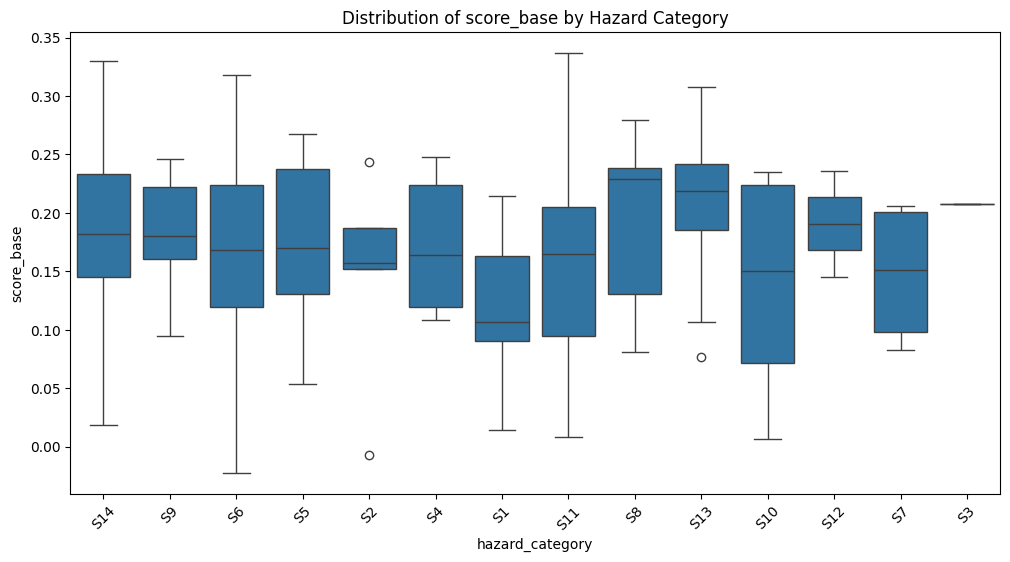

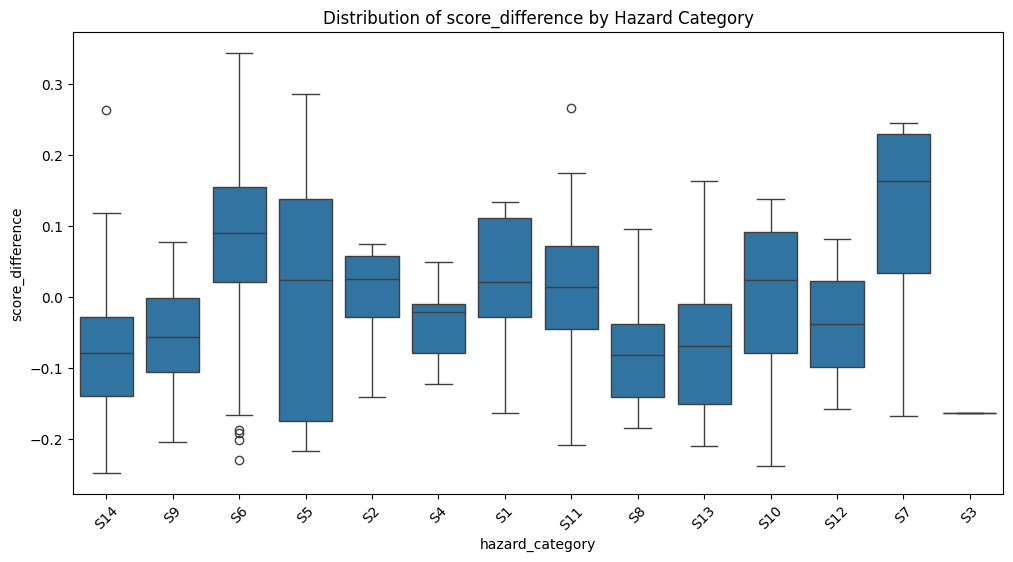

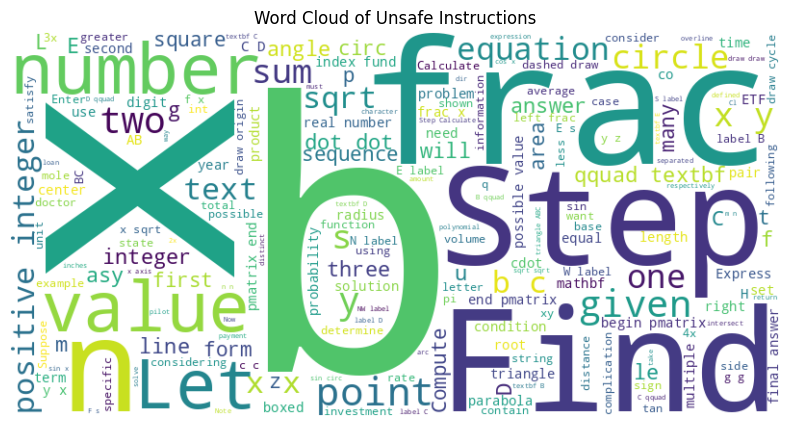

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Convert dataset to pandas DataFrame
df = pd.DataFrame({
    'safe': dataset['train']['safe'],
    'hazard_category': dataset['train']['hazard_category'],
    'difficulty': dataset['train']['difficulty'],
    'quality': dataset['train']['quality'],
    'primary_tag': dataset['train']['primary_tag'],
    'score': dataset['train']['score'],
    'score_base': dataset['train']['score_base'],
    'score_difference': dataset['train']['score_difference']
})

# 1. Analyze relationship between 'safe' and other features

# Categorical features
categorical_features = ['difficulty', 'quality', 'primary_tag']

print("Relationship between 'safe' and categorical features:")
for feature in categorical_features:
    contingency_table = pd.crosstab(df['safe'], df[feature])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\n{feature}:")
    print(f"Chi2 statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")

    # Visualize
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=feature, hue='safe')
    plt.title(f'Distribution of {feature} by Safety')
    plt.xticks(rotation=45)
    plt.show()

# Numerical features
numerical_features = ['score', 'score_base', 'score_difference']

print("\nRelationship between 'safe' and numerical features:")
for feature in numerical_features:
    safe_mean = df[df['safe'] == True][feature].mean()
    unsafe_mean = df[df['safe'] == False][feature].mean()
    print(f"\n{feature}:")
    print(f"Mean for safe: {safe_mean:.4f}")
    print(f"Mean for unsafe: {unsafe_mean:.4f}")

    # Visualize
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='safe', y=feature)
    plt.title(f'Distribution of {feature} by Safety')
    plt.show()

# 2. Investigate patterns in 'hazard_category'

# Distribution of hazard categories
hazard_counts = df['hazard_category'].value_counts()
print("\nDistribution of hazard categories:")
print(hazard_counts)

# Visualize hazard category distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=hazard_counts.index, y=hazard_counts.values)
plt.title('Distribution of Hazard Categories')
plt.xticks(rotation=45)
plt.show()

# Relationship between hazard category and other features
print("\nRelationship between hazard category and other features:")
for feature in categorical_features + numerical_features:
    if feature in categorical_features:
        contingency_table = pd.crosstab(df['hazard_category'], df[feature])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print(f"\n{feature}:")
        print(f"Chi2 statistic: {chi2:.4f}")
        print(f"p-value: {p_value:.4f}")
    else:
        f_statistic, p_value = f_oneway(*[group[feature].values for name, group in df.groupby('hazard_category')])
        print(f"\n{feature}:")
        print(f"F-statistic: {f_statistic:.4f}")
        print(f"p-value: {p_value:.4f}")

# Visualize relationship between hazard category and numerical features
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='hazard_category', y=feature)
    plt.title(f'Distribution of {feature} by Hazard Category')
    plt.xticks(rotation=45)
    plt.show()

# Word cloud of unsafe instructions (if 'instruction' is available in the dataset)
if 'instruction' in dataset['train'].features:
    from wordcloud import WordCloud

    unsafe_instructions = [instr for instr, safe in zip(dataset['train']['instruction'], df['safe']) if not safe]
    unsafe_text = ' '.join(unsafe_instructions)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unsafe_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Unsafe Instructions')
    plt.show()

### 'instruction' vs 'response' comparison

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is your loaded dataset
df = pd.DataFrame({
    'instruction': dataset['train']['instruction'],
    'response': dataset['train']['response'],
    'score': dataset['train']['score'],
    'quality': dataset['train']['quality']
})

# Calculate lengths
df['instruction_length'] = df['instruction'].str.len()
df['response_length'] = df['response'].str.len()

# Encode 'quality' column
le = LabelEncoder()
df['quality_encoded'] = le.fit_transform(df['quality'])

# Analyze length correlation with score and encoded quality
print("Correlation between lengths, score, and encoded quality:")
print(df[['instruction_length', 'response_length', 'score', 'quality_encoded']].corr())

# Topic modeling
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
instruction_tfidf = tfidf.fit_transform(df['instruction'])
response_tfidf = tfidf.fit_transform(df['response'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
instruction_topics = lda.fit_transform(instruction_tfidf)
response_topics = lda.fit_transform(response_tfidf)

# Add topic columns to DataFrame
for i in range(5):
    df[f'instruction_topic_{i}'] = instruction_topics[:, i]
    df[f'response_topic_{i}'] = response_topics[:, i]

# Sentiment analysis
df['instruction_sentiment'] = df['instruction'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['response_sentiment'] = df['response'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Analyze sentiment correlation with score and encoded quality
print("\nCorrelation between sentiment, score, and encoded quality:")
print(df[['instruction_sentiment', 'response_sentiment', 'score', 'quality_encoded']].corr())

# Keyword overlap
def keyword_overlap(text1, text2):
    words1 = set(text1.lower().split())
    words2 = set(text2.lower().split())
    return len(words1.intersection(words2)) / len(words1.union(words2))

df['keyword_overlap'] = df.apply(lambda row: keyword_overlap(row['instruction'], row['response']), axis=1)

# Analyze keyword overlap correlation with score and encoded quality
print("\nCorrelation between keyword overlap, score, and encoded quality:")
print(df[['keyword_overlap', 'score', 'quality_encoded']].corr())

# Print quality encoding mapping
print("\nQuality encoding mapping:")
for i, quality in enumerate(le.classes_):
    print(f"{quality}: {i}")

Correlation between lengths, score, and encoded quality:
                    instruction_length  response_length     score  \
instruction_length            1.000000        -0.042869 -0.415314   
response_length              -0.042869         1.000000 -0.237480   
score                        -0.415314        -0.237480  1.000000   
quality_encoded               0.085350         0.006114  0.018731   

                    quality_encoded  
instruction_length         0.085350  
response_length            0.006114  
score                      0.018731  
quality_encoded            1.000000  

Correlation between sentiment, score, and encoded quality:
                       instruction_sentiment  response_sentiment     score  \
instruction_sentiment               1.000000            0.320737 -0.010262   
response_sentiment                  0.320737            1.000000 -0.053804   
score                              -0.010262           -0.053804  1.000000   
quality_encoded                    

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway

# Add 'intent', 'knowledge', and 'primary_tag' to the DataFrame
df['intent'] = dataset['train']['intent']
df['knowledge'] = dataset['train']['knowledge']
df['primary_tag'] = dataset['train']['primary_tag']

# Encode categorical variables
df['intent_encoded'] = le.fit_transform(df['intent'])
df['knowledge_encoded'] = le.fit_transform(df['knowledge'])
df['primary_tag_encoded'] = le.fit_transform(df['primary_tag'])

# Calculate correlation
encoded_corr = df[['intent_encoded', 'knowledge_encoded', 'primary_tag_encoded', 'score', 'quality_encoded']].corr()
print("Correlation between encoded variables, score, and encoded quality:")
print(encoded_corr[['score', 'quality_encoded']])

# ANOVA tests
from scipy.stats import f_oneway

def anova_test(df, category, metric):
    groups = [group[metric].values for name, group in df.groupby(category)]
    f_value, p_value = f_oneway(*groups)
    return f_value, p_value

categories = ['intent', 'knowledge', 'primary_tag']
metrics = ['score', 'quality_encoded']

for category in categories:
    for metric in metrics:
        f_value, p_value = anova_test(df, category, metric)
        print(f"ANOVA test for {category} and {metric}:")
        print(f"F-value: {f_value}, p-value: {p_value}")
        print()

# Top performing categories
for category in categories:
    print(f"Top 5 {category} categories by average score:")
    print(df.groupby(category)['score'].mean().sort_values(ascending=False).head())
    print()
    print()

# long instructions lead lower scores typically
#lonmg responses also have a slight tendency of leading to lower scores
# sentiment of instructions and responses doesn't seem to strongly influence scores or quality ratings.
#higher keyword overlap between instructions and responses is seems to be linked  with slightly lower scores.
#weak correlations between quality ratings and other features -> quality is probably determined by factors not captured in these basic features



Correlation between encoded variables, score, and encoded quality:
                        score  quality_encoded
intent_encoded       0.065334        -0.001530
knowledge_encoded    0.029590        -0.004942
primary_tag_encoded  0.161744         0.018058
score                1.000000         0.018731
quality_encoded      0.018731         1.000000
ANOVA test for intent and score:
F-value: 3.4969396148529026, p-value: 0.0

ANOVA test for intent and quality_encoded:
F-value: 1.1427312708755737, p-value: 2.2674942137739354e-10

ANOVA test for knowledge and score:
F-value: 2.4496984636992973, p-value: 3.973036863664113e-11

ANOVA test for knowledge and quality_encoded:
F-value: 1.1068512430140705, p-value: 0.21265801591658362

ANOVA test for primary_tag and score:
F-value: 659.9054472574339, p-value: 0.0

ANOVA test for primary_tag and quality_encoded:
F-value: 24.00113959507076, p-value: 8.911465007464001e-46

Top 5 intent categories by average score:
intent
The user wants to calculate the

## mappings for creating our dataset
### TODO Needs better mappings
currently all code related problems are being mapped to financial/spreadsheets


<Figure size 1200x800 with 0 Axes>

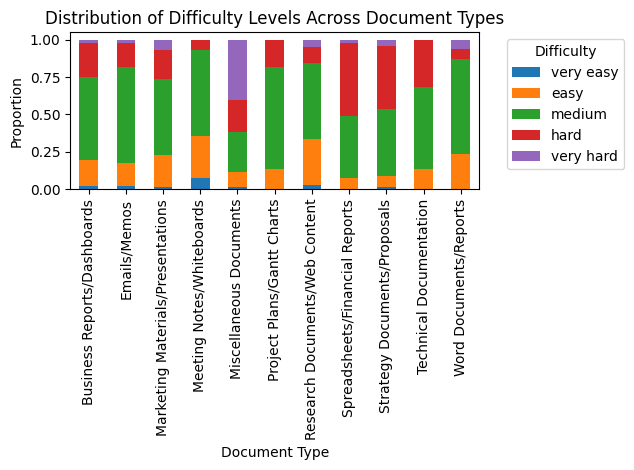

<ipython-input-38-fb94d58dd418>:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_scores = df.groupby(['document_type', 'difficulty'])['score'].mean().unstack()


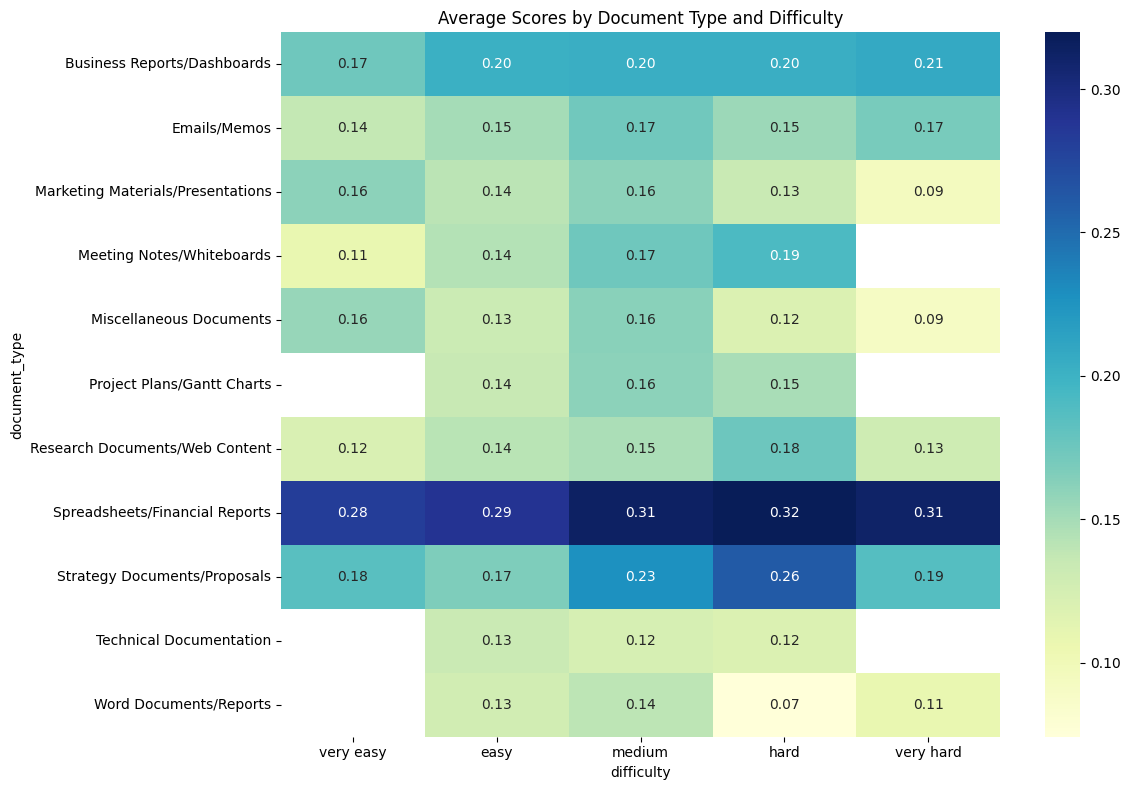

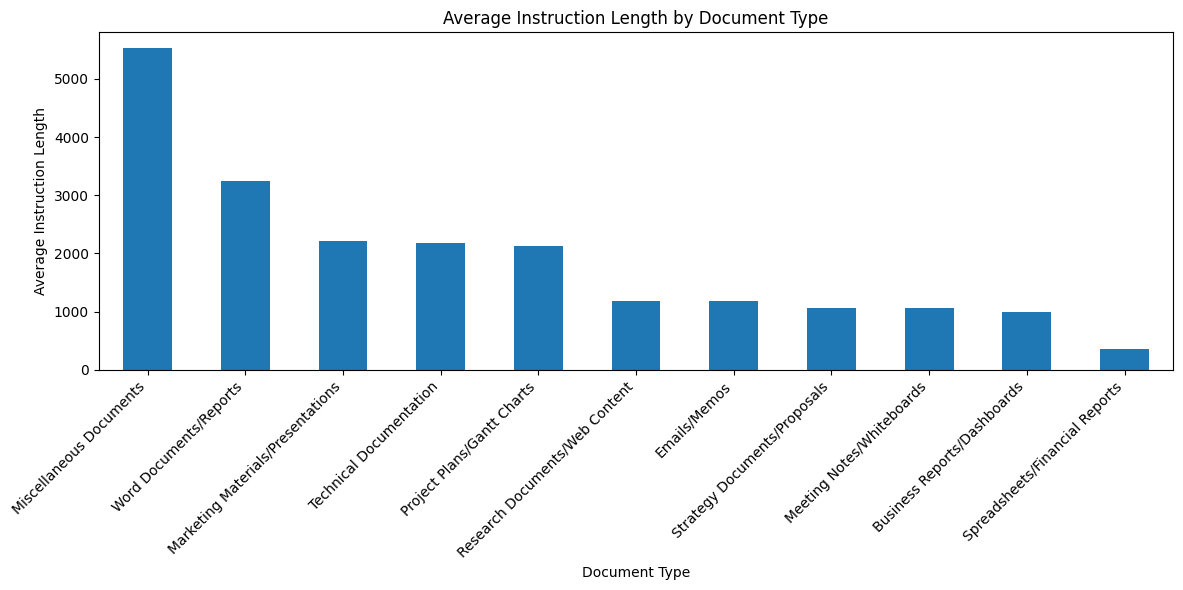

Summary Statistics:

Document Type Distribution:
document_type
Spreadsheets/Financial Reports       0.96984
Research Documents/Web Content       0.00920
Strategy Documents/Proposals         0.00802
Technical Documentation              0.00340
Business Reports/Dashboards          0.00298
Emails/Memos                         0.00216
Marketing Materials/Presentations    0.00122
Miscellaneous Documents              0.00120
Word Documents/Reports               0.00094
Project Plans/Gantt Charts           0.00076
Meeting Notes/Whiteboards            0.00028
Name: proportion, dtype: float64

Average Score by Document Type:
document_type
Spreadsheets/Financial Reports       0.314989
Strategy Documents/Proposals         0.234933
Business Reports/Dashboards          0.202467
Emails/Memos                         0.166271
Meeting Notes/Whiteboards            0.162174
Project Plans/Gantt Charts           0.155395
Research Documents/Web Content       0.147231
Marketing Materials/Presentations    0.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is your loaded dataset
df = pd.DataFrame({
    'primary_tag': dataset['train']['primary_tag'],
    'difficulty': dataset['train']['difficulty'],
    'instruction': dataset['train']['instruction'],
    'score': dataset['train']['score']
})

# 1. Document type mapping
document_type_mapping = {
    'Math': 'Spreadsheets/Financial Reports',
    'Information seeking': 'Research Documents/Web Content',
    'Reasoning': 'Strategy Documents/Proposals',
    'Coding & Debugging': 'Technical Documentation',
    'Data analysis': 'Business Reports/Dashboards',
    'Advice seeking': 'Emails/Memos',
    'Creative writing': 'Marketing Materials/Presentations',
    'Editing': 'Word Documents/Reports',
    'Planning': 'Project Plans/Gantt Charts',
    'Brainstorming': 'Meeting Notes/Whiteboards',
    'Others': 'Miscellaneous Documents'
}

df['document_type'] = df['primary_tag'].map(document_type_mapping)

# 2. Analyze difficulty levels across document types
difficulty_order = ['very easy', 'easy', 'medium', 'hard', 'very hard']
df['difficulty'] = pd.Categorical(df['difficulty'], categories=difficulty_order, ordered=True)

# Create a cross-tabulation of document types and difficulty levels
difficulty_distribution = pd.crosstab(df['document_type'], df['difficulty'], normalize='index')

# Visualize the distribution
plt.figure(figsize=(12, 8))
difficulty_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Difficulty Levels Across Document Types')
plt.xlabel('Document Type')
plt.ylabel('Proportion')
plt.legend(title='Difficulty', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Analyze average scores for each document type and difficulty level
avg_scores = df.groupby(['document_type', 'difficulty'])['score'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(avg_scores, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Scores by Document Type and Difficulty')
plt.tight_layout()
plt.show()

# 4. Analyze instruction length for different document types
df['instruction_length'] = df['instruction'].str.len()
avg_instruction_length = df.groupby('document_type')['instruction_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_instruction_length.plot(kind='bar')
plt.title('Average Instruction Length by Document Type')
plt.xlabel('Document Type')
plt.ylabel('Average Instruction Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Print summary statistics
print("Summary Statistics:")
print("\nDocument Type Distribution:")
print(df['document_type'].value_counts(normalize=True))

print("\nAverage Score by Document Type:")
print(df.groupby('document_type')['score'].mean().sort_values(ascending=False))

print("\nMost Common Difficulty Level by Document Type:")
print(df.groupby('document_type')['difficulty'].agg(lambda x: x.value_counts().index[0]))

# 6. Analyze keyword usage in instructions for different document types
from sklearn.feature_extraction.text import CountVectorizer

def get_top_keywords(text, n=5):
    vectorizer = CountVectorizer(stop_words='english')
    count_matrix = vectorizer.fit_transform(text)
    words = vectorizer.get_feature_names_out()
    word_counts = count_matrix.sum(axis=0).A1
    top_words = [words[i] for i in word_counts.argsort()[::-1][:n]]
    return ', '.join(top_words)

top_keywords = df.groupby('document_type')['instruction'].apply(get_top_keywords)
print("\nTop Keywords in Instructions by Document Type:")
print(top_keywords)

### embeddings analysis

Top 5 most similar instructions to the sample document:
                                             instruction  similarity_to_sample
0      Cloudflare hosts a popular web page that can b...              1.000000
30412  An engineering firm provides services for trus...              0.716690
37262  ## Step 1: Understand the problem and the give...              0.715819
25808  The junior and senior classes of a high school...              0.708339
42486  Write a program to calculate the average of nu...              0.706302


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


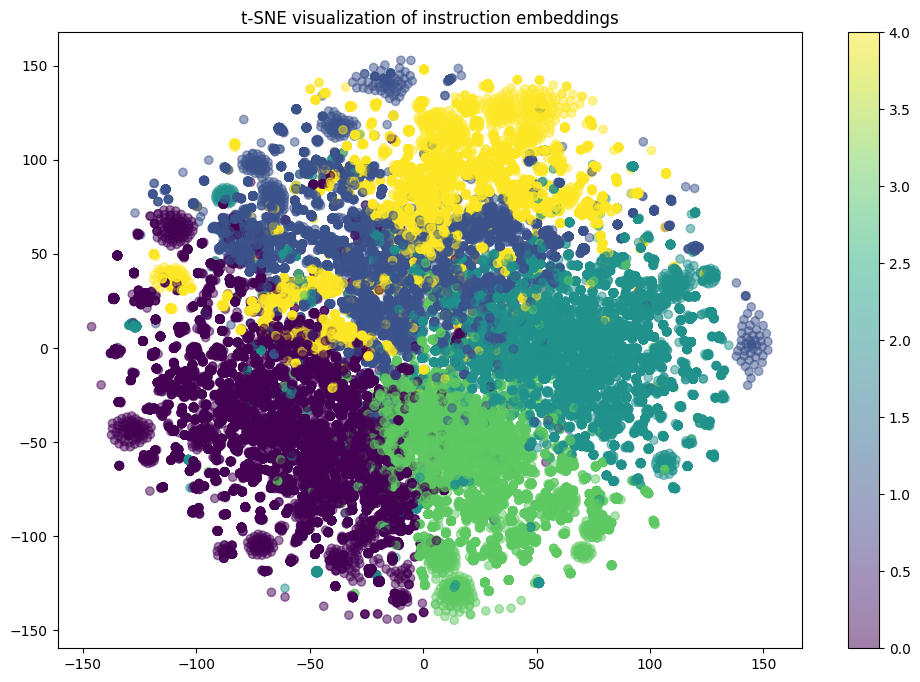


Cluster 0:
Size: 12943
Top 5 primary tags:
primary_tag
Math                   12861
Reasoning                 48
Information seeking       17
Coding & Debugging        11
Data analysis              5
Name: count, dtype: int64
Sample instructions:
['Lines $l_1^{}$ and $l_2^{}$ both pass through the origin and make first-quadrant angles of $\\frac{\\pi}{70}$ and $\\frac{\\pi}{54}$ radians, respectively, with the positive $x$-axis. For any line  $l$, the transformation $R(l)$ produces another line as follows: $l$ is reflected in $l_1$, and the resulting line is reflected in $l_2$. Let $R^{(1)}(l)=R(l)$ and $R^{(n)}(l)=R\\left(R^{(n-1)}(l)\\right)$. Given that $l$ is the line $y=\\frac{19}{92}x$, find the smallest positive integer $m$ for which $R^{(m)}(l)=l$.', 'Let $\\triangle ABC$ be a right triangle such that $B$ is a right angle. A circle with diameter of $BC$ meets side $AC$ at $D.$ If $AD = 1$ and $BD = 4,$ then what is $CD$?', 'There are four points that are $5$ units from the lin

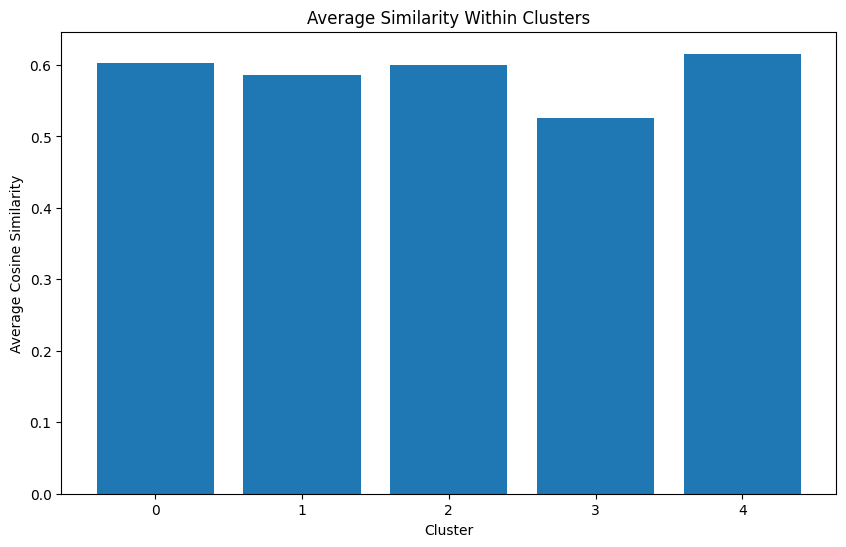


Recommended prompts for the sample document:
                                             instruction  similarity
0      Cloudflare hosts a popular web page that can b...    1.000000
30412  An engineering firm provides services for trus...    0.716690
37262  ## Step 1: Understand the problem and the give...    0.715819
25808  The junior and senior classes of a high school...    0.708339
42486  Write a program to calculate the average of nu...    0.706302


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame({
    'instruction': dataset['train']['instruction'],
    'primary_tag': dataset['train']['primary_tag'],
    'embedding': dataset['train']['embedding']
})

# Convert embeddings to numpy array
embeddings = np.array(df['embedding'].tolist())

# 1. Create a similarity metric
def compute_similarity(doc_embedding, instruction_embeddings):
    return cosine_similarity([doc_embedding], instruction_embeddings)[0]

# Example: Compute similarity between a sample document and all instructions
sample_doc_embedding = embeddings[0]  # Using the first embedding as a sample document
similarities = compute_similarity(sample_doc_embedding, embeddings)

# Add similarities to the dataframe
df['similarity_to_sample'] = similarities

# Print top 5 most similar instructions to the sample document
print("Top 5 most similar instructions to the sample document:")
print(df.sort_values('similarity_to_sample', ascending=False)[['instruction', 'similarity_to_sample']].head())

# 2. Clustering of embeddings
n_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Add cluster labels to the dataframe
df['cluster'] = cluster_labels

# 3. Visualize clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Create a plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title('t-SNE visualization of instruction embeddings')
plt.show()

# 4. Analyze clusters
for cluster in range(n_clusters):
    cluster_instructions = df[df['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Size: {len(cluster_instructions)}")
    print("Top 5 primary tags:")
    print(cluster_instructions['primary_tag'].value_counts().head())
    print("Sample instructions:")
    print(cluster_instructions['instruction'].sample(3).tolist())
    print("-" * 50)

# 5. Compute average similarity within clusters
def compute_average_similarity(embeddings):
    similarities = cosine_similarity(embeddings)
    return np.mean(similarities)

cluster_similarities = []
for cluster in range(n_clusters):
    cluster_embeddings = embeddings[df['cluster'] == cluster]
    avg_similarity = compute_average_similarity(cluster_embeddings)
    cluster_similarities.append(avg_similarity)

# Plot average similarities
plt.figure(figsize=(10, 6))
plt.bar(range(n_clusters), cluster_similarities)
plt.title('Average Similarity Within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Cosine Similarity')
plt.show()

# 6. Create a function to recommend prompts based on a given document embedding
def recommend_prompts(doc_embedding, df, top_n=5):
    similarities = compute_similarity(doc_embedding, np.array(df['embedding'].tolist()))
    df_temp = df.copy()
    df_temp['similarity'] = similarities
    return df_temp.sort_values('similarity', ascending=False)[['instruction', 'similarity']].head(top_n)

# Example: Recommend prompts for a sample document
sample_doc_embedding = embeddings[0]  # Using the first embedding as a sample document
recommended_prompts = recommend_prompts(sample_doc_embedding, df)
print("\nRecommended prompts for the sample document:")
print(recommended_prompts)